# Plotting 1: Fixed $\Lambda_d = 5$ GeV and Varing $r_\mathrm{inv}$

## 1. Import Packages

In [1]:
# The Python Standard Library

# The Third-Party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (AutoLocator, MaxNLocator)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, LogLocator)

# My Packages
from plotting import plotting

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load Datasets

In [2]:
path_data = '/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/'
dataset_csv = ['status23', 'status71', 'jet', 'met', 'jet_met',
               'n_jet', 'jj', 'jjj', 'jj_met', 'jjj_met']
dataset_npz = ['neutrinos', 'weight']
# fixed Lambdad = 5 and varying rinv = [0, 0.3, 0.6, 1]
rinv = [0, 0.3, 0.6, 1]

# load .csv & .npz into pd.DataFrame() & np.array()
dataset, weight_npz = [], []
for i, r in enumerate(rinv):
    print(f'Dataset {i + 1}: rinv = {r}')
    folder = f'Lambdad5_rinv{int(r * 10)}/'
    file = f'_rinv{int(r * 10)}_Lambdad5'
    print(path_data + folder + file)
    npz = np.load(path_data + folder + 'weight' + file + '_ckkwl.npz', allow_pickle=True)
    weight_npz.append(npz)
    for j, data in enumerate(dataset_csv):
        # print(j, data)
        # print(j, folder + data + file + '_ckkwl.csv')
        df = pd.read_csv(path_data + folder + data + file + '_ckkwl.csv')
        dataset.append(df)
    print('-'*80)

Dataset 1: rinv = 0
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv0/_rinv0_Lambdad5
--------------------------------------------------------------------------------
Dataset 2: rinv = 0.3
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv3/_rinv3_Lambdad5
--------------------------------------------------------------------------------
Dataset 3: rinv = 0.6
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv6/_rinv6_Lambdad5
--------------------------------------------------------------------------------
Dataset 4: rinv = 1
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv10/_rinv10_Lambdad5
--------------------------------------------------------------------------------


In [3]:
# every 10 is a cycle
for j, data in enumerate(dataset_csv):
    print(j, data)

0 status23
1 status71
2 jet
3 met
4 jet_met
5 n_jet
6 jj
7 jjj
8 jj_met
9 jjj_met


### A. Simple check

In [4]:
print(f'{len(dataset)} data in dataset')
print(f'{len(weight_npz)} data in weight_npz')

40 data in dataset
4 data in weight_npz


In [5]:
dataset[12].head()

N_jet        pT_1        pT_2        pT_3        pT_4     eta_1  \
0    2.0   87.399442   64.213808 -999.000000 -999.000000  0.187685   
1    3.0  156.631723  116.276794  100.766976 -999.000000 -0.720677   
2    1.0  180.418744 -999.000000 -999.000000 -999.000000 -1.262694   
3    1.0  123.361312 -999.000000 -999.000000 -999.000000  1.777785   
4    4.0  163.660012   72.199409   33.798631   25.914431 -0.501624   

        eta_2       eta_3       eta_4     phi_1       phi_2       phi_3  \
0    0.613261 -999.000000 -999.000000 -0.162607   -0.410417 -999.000000   
1   -1.840887   -2.304753 -999.000000  1.453170   -2.920251   -2.086857   
2 -999.000000 -999.000000 -999.000000  2.763893 -999.000000 -999.000000   
3 -999.000000 -999.000000 -999.000000 -0.543866 -999.000000 -999.000000   
4    1.195995    1.194867   -0.849276 -2.365578   -2.805764    0.611460   

        phi_4     mass_1      mass_2      mass_3      mass_4  
0 -999.000000  13.970557   11.678316 -999.000000 -999.000000  
1 -999.000000  24.607911   21.576661   12.046796 -999.000000  
2 -999.000000  34.021953 -999.000000 -999.000000 -999.000000  
3 -999.000000  23.160264 -999.000000 -999.000000 -999.000000  
4    1.376696  33.096091   15.648594    8.263577    8.521142

In [6]:
weight_npz

In [7]:
weight_npz[0].files

['weight_1', 'weight_2']

In [8]:
weight_npz[0]['weight_2']

array([2.7949634e-14, 2.7949634e-14, 4.1366087e-14, ..., 2.7949634e-14,
       2.7949634e-14, 2.7949634e-14], dtype=float32)

In [9]:
weight_npz[1]['weight_2']

array([2.7949634e-14, 2.7949634e-14, 4.1366087e-14, ..., 3.5438452e-14,
       2.7949634e-14, 2.7949634e-14], dtype=float32)

In [10]:
rinv = [0, 0.3, 0.6, 1]
print('when fixed Lambdad = 5 GeV:')
for i in range(len(weight_npz)):
    print(f"* cross-section of rinv {rinv[i]} = {np.sum(weight_npz[i]['weight_2'] * (10**9))} pb")

when fixed Lambdad = 5 GeV:
* cross-section of rinv 0 = 0.5759936906961745 pb
* cross-section of rinv 0.3 = 0.5777782906857286 pb
* cross-section of rinv 0.6 = 0.5760763608289176 pb
* cross-section of rinv 1 = 0.5740604635582307 pb


##### Conclusion: Well done!!

## 3. Plot

In [11]:
# * define global parameters
# binning, color, label
binning, binning_50gev = np.linspace(0, 5000, 51), np.linspace(0, 5000, 101)
binning_eta, binning_phi = np.linspace(-10, 10, 41), np.linspace(0, np.pi, 21)
binning_pm_phi = np.linspace(-np.pi, np.pi, 21)
color = ['red', 'green', 'blue', 'purple']
label = [r'$r_\mathrm{inv} = 0$', r'$r_\mathrm{inv} = 0.3$',
         r'$r_\mathrm{inv} = 0.6$', r'$r_\mathrm{inv} = 1$']

# text
# a. with preselection
text = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
        r'$\Lambda_d = 5$ GeV', 'Preselection']
# b. with truth level
text_truth = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
              r'$\Lambda_d = 5$ GeV', 'Truth level']
# c. with event selection Njet >= 2
text_Njet2 = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
              r'$\Lambda_d = 5$ GeV', r'$N_\mathrm{jet} \geq 2$']
# d. with event selection Njet >= 3
text_Njet3 = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
              r'$\Lambda_d = 5$ GeV', r'$N_\mathrm{jet} \geq 3$']
text_xy = (0.05, 0.93)

# weight
weight = [weight_npz[i]['weight_2'] * (10**9) for i in range(len(weight_npz))]
weight_normalized = [(weight_npz[i]['weight_2'] * (10**9))/np.sum(weight_npz[i]['weight_2'] * (10**9)) for i in range(len(weight_npz))]
print('Define normalized weights for leading 4 jets in the truth level:')
weight_j1_norm1, weight_j2_norm1, weight_j3_norm1, weight_j4_norm1 = [], [], [], []
for i, d in enumerate([0, 10, 20, 30]):
    print(f'{i+1}. data {d}, normalized weight of [j_1 j_2 j_3 j_4] =')
    d1, d2 = dataset[d+2]['pT_1'].to_numpy(), dataset[d+2]['pT_2'].to_numpy()
    d3, d4 = dataset[d+2]['pT_3'].to_numpy(), dataset[d+2]['pT_4'].to_numpy()
    w = weight[i]
    weight_j1_norm1.append(w/np.sum(w[d1 >= 0]))
    weight_j2_norm1.append(w/np.sum(w[d2 >= 0]))
    weight_j3_norm1.append(w/np.sum(w[d3 >= 0]))
    weight_j4_norm1.append(w/np.sum(w[d4 >= 0]))
    hist1, bins = np.histogram(d1, bins=binning, weights=w/np.sum(w[d1 >= 0]))
    hist2, bins = np.histogram(d2, bins=binning, weights=w/np.sum(w[d2 >= 0]))
    hist3, bins = np.histogram(d3, bins=binning, weights=w/np.sum(w[d3 >= 0]))
    hist4, bins = np.histogram(d4, bins=binning, weights=w/np.sum(w[d4 >= 0]))
    print(f'   {np.sum(hist1), np.sum(hist2), np.sum(hist3), np.sum(hist4)}')

# selected events
# a. truth level and preselection
selected_all = [np.arange(dataset[i].shape[0]) for i in range(0, len(dataset), 10)]
# b. dijet
selected_jj = [dataset[i+6]['selected'].to_numpy().astype('int64') for i in range(0, len(dataset), 10)]
# c. trijet
selected_jjj = [dataset[i+7]['selected'].to_numpy().astype('int64') for i in range(0, len(dataset), 10)]

# weight for dijet and trijet
weight_jj_norm1, weight_jjj_norm1 = [], []
for i, d in enumerate([0, 10, 20, 30]):
    w = weight[i]
    weight_jj_norm1.append(w/np.sum(w[selected_jj[i]]))
    weight_jjj_norm1.append(w/np.sum(w[selected_jjj[i]]))

print('*'*80)
# print the information
rinv = [0, 0.3, 0.6, 1]
for i, r in enumerate(rinv):
    print(f'* rinv = {r}: cross-section = {np.sum(weight[i])} pb')
    print(f'            normalized to = {np.sum(weight_normalized[i])} pb')
    print('-'*60)

Define normalized weights for leading 4 jets in the truth level:
1. data 0, normalized weight of [j_1 j_2 j_3 j_4] =
   (0.9999999999998056, 1.000000000000191, 0.9999999999998275, 0.9999999999996578)
2. data 10, normalized weight of [j_1 j_2 j_3 j_4] =
   (1.0000000000001348, 0.9999999999998179, 0.9999999999995298, 0.9999999999999816)
3. data 20, normalized weight of [j_1 j_2 j_3 j_4] =
   (1.0000000000002998, 0.9999999999998688, 1.0000000000005211, 0.9999999999994449)
4. data 30, normalized weight of [j_1 j_2 j_3 j_4] =
   (0.9999999999997561, 0.9999999999995173, 1.000000000000484, 1.0000000000005151)
********************************************************************************
* rinv = 0: cross-section = 0.5759936906961745 pb
            normalized to = 1.0000000000000004 pb
------------------------------------------------------------
* rinv = 0.3: cross-section = 0.5777782906857286 pb
            normalized to = 1.0 pb
------------------------------------------------------------


In [12]:
selected_all

[array([    0,     1,     2, ..., 19331, 19332, 19333]),
 array([    0,     1,     2, ..., 19370, 19371, 19372]),
 array([    0,     1,     2, ..., 19325, 19326, 19327]),
 array([    0,     1,     2, ..., 19283, 19284, 19285])]

In [13]:
selected_jj

[array([    0,     1,     2, ..., 19331, 19332, 19333]),
 array([    0,     1,     4, ..., 19370, 19371, 19372]),
 array([    1,     2,     3, ..., 19324, 19325, 19326]),
 array([    4,     6,     8, ..., 19271, 19281, 19283])]

In [14]:
[np.sum(weight_jj_norm1[i][selected_jj[i]]) for i in range(4)]

[0.9999999999999996, 0.9999999999999997, 1.0000000000000004, 1.0]

In [15]:
[np.sum(weight_jjj_norm1[i][selected_jjj[i]]) for i in range(4)]

[1.0, 1.0, 0.9999999999999998, 1.0]

### 3-1. Dark quark pair and truth level
* $M(\chi, \bar{\chi})$
* $M_T(\chi, \bar{\chi})$
* $m_T(\chi, \bar{\chi})$
* $\Delta\phi(\chi, \bar{\chi})$
* $\Delta\eta(\chi, \bar{\chi})$
* $p_T(\chi)$, $p_T(\bar{\chi})$
* $\eta(\chi)$, $\eta(\bar{\chi})$

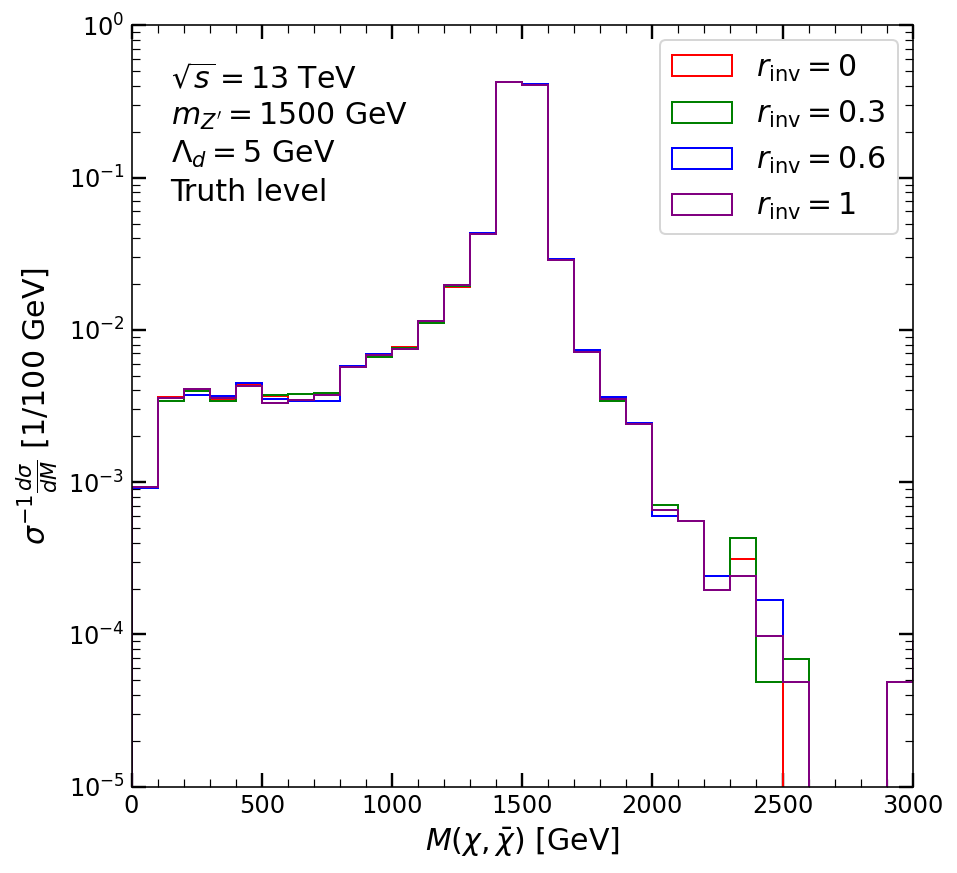

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [16]:
# 1. M(xd, xdx)
hist, bins = plotting('M_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      density=False, weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_01-M_xdxdx.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

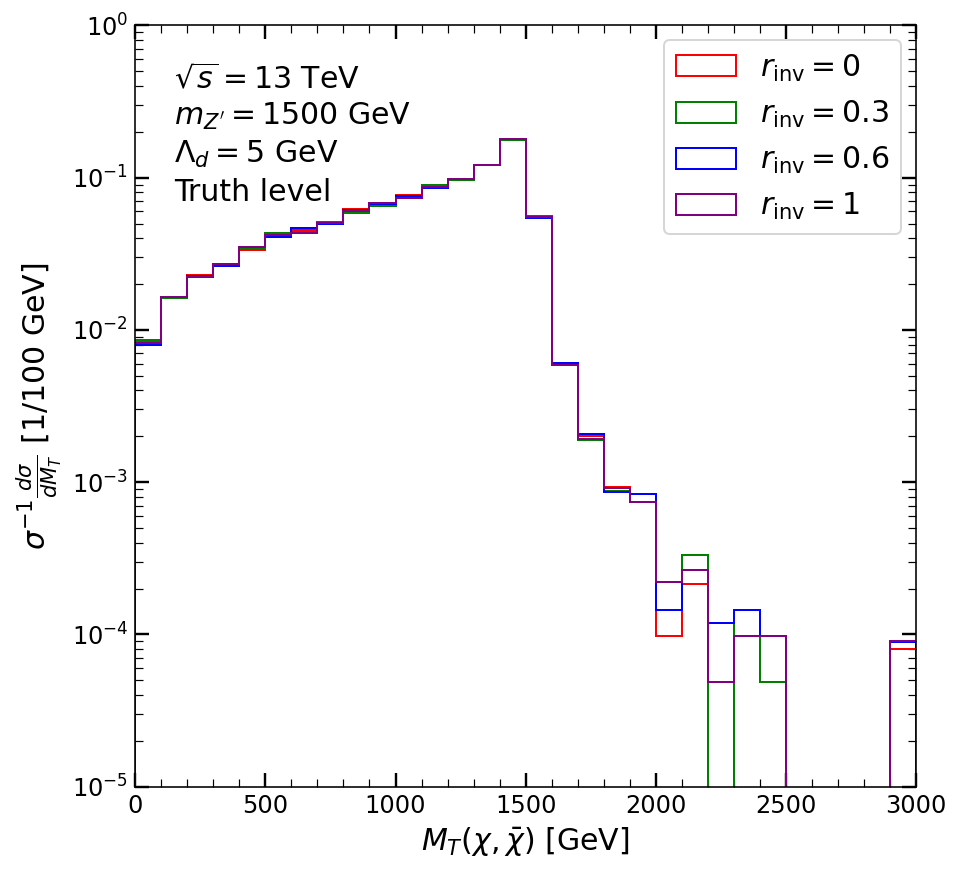

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [17]:
# 2. M_T(xd, xdx)
hist, bins = plotting('MT_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_02-MT_xdxdx.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

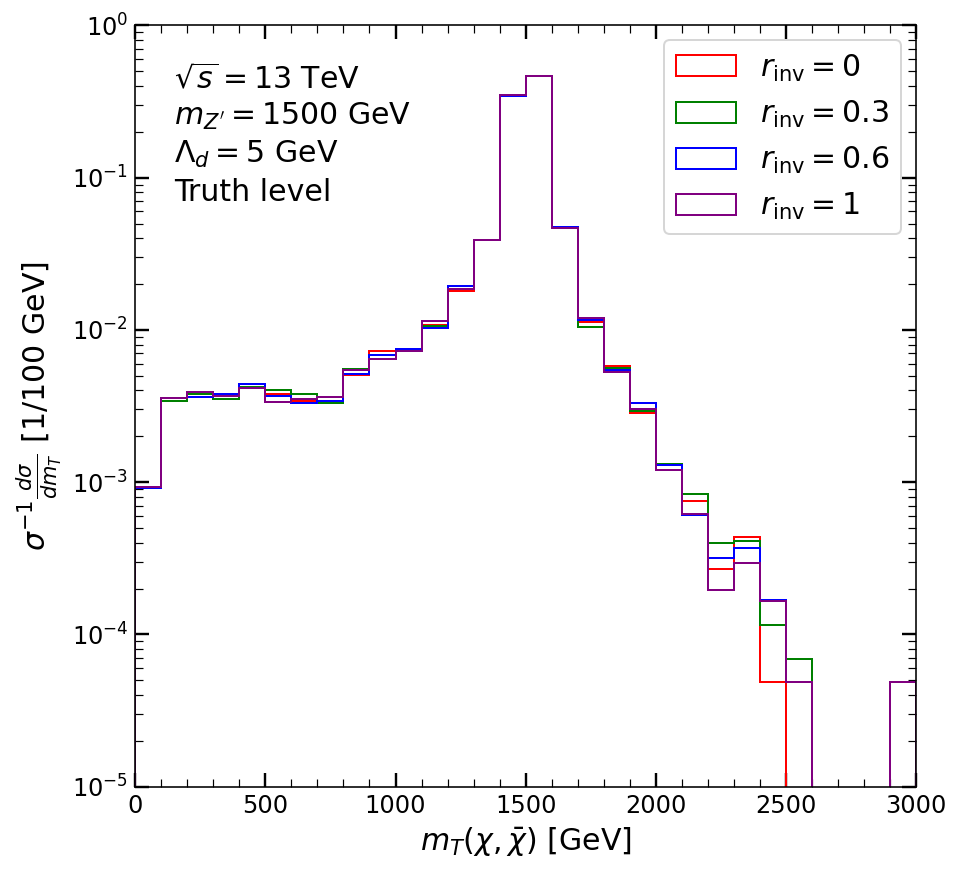

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [18]:
# 3. m_T(xd, xdx)
hist, bins = plotting('mT_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$m_T(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dm_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_03-mT_xdxdx.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

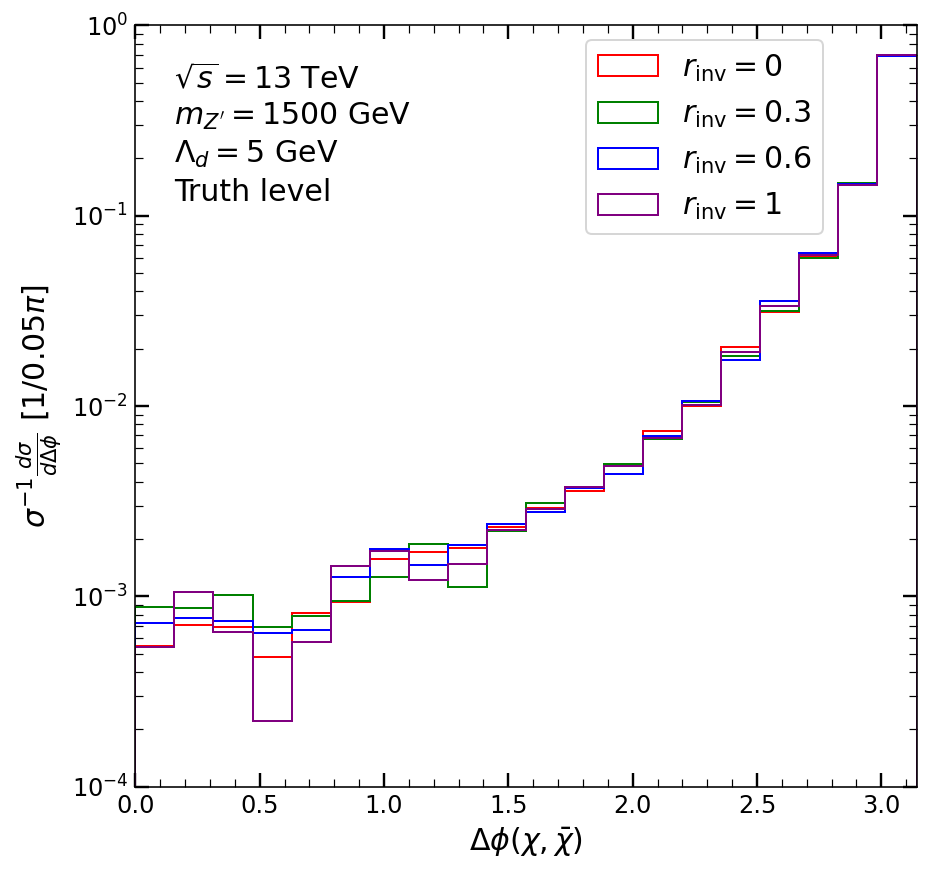

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [19]:
# 4. \Delta\phi(xd, xdx)
hist, bins = plotting('Dphi_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      legend_bbox_to_anchor=(0.9, 1),
                      xlabel=r'$\Delta\phi(\chi, \bar{\chi})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_04-Dphi_xdxdx.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

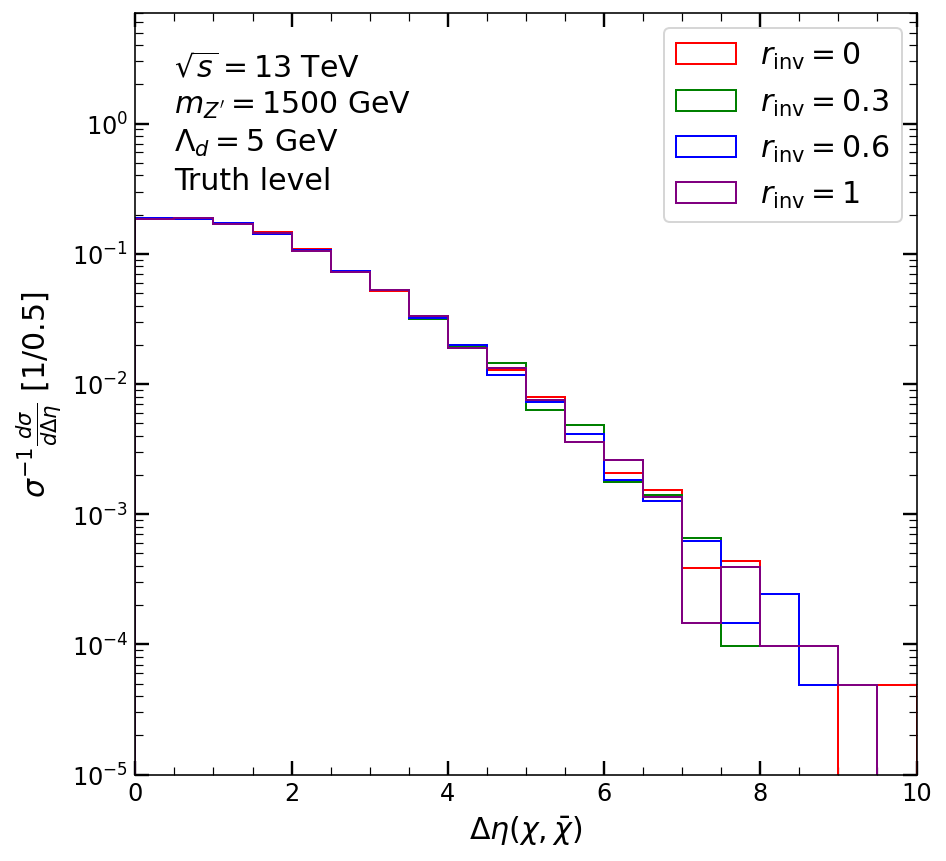

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [20]:
# 5. \Delta\eta(xd, xdx)
hist, bins = plotting('Deta_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      np.linspace(-20, 20, 81), color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\eta(\chi, \bar{\chi})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 10), ylim=(1/100000, 7),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_05-Deta_xdxdx.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

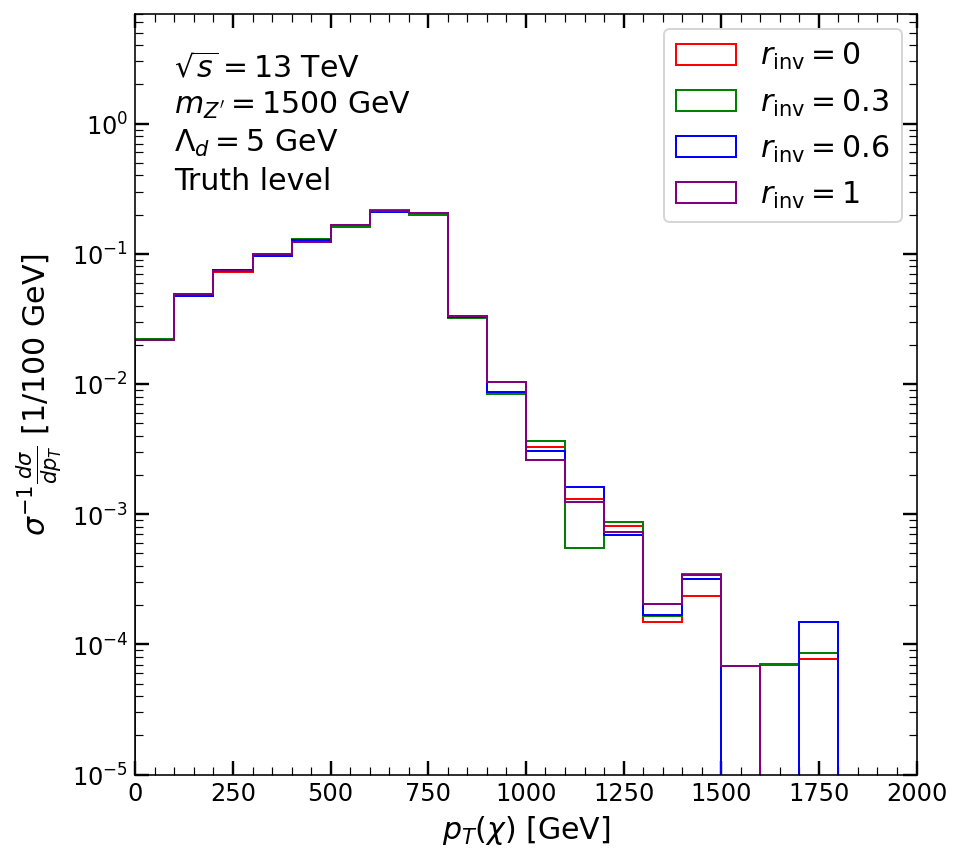

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [21]:
# 6. p_T(xd)
hist, bins = plotting('pT_xd', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(\chi)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 7),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_06-pT_xd.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

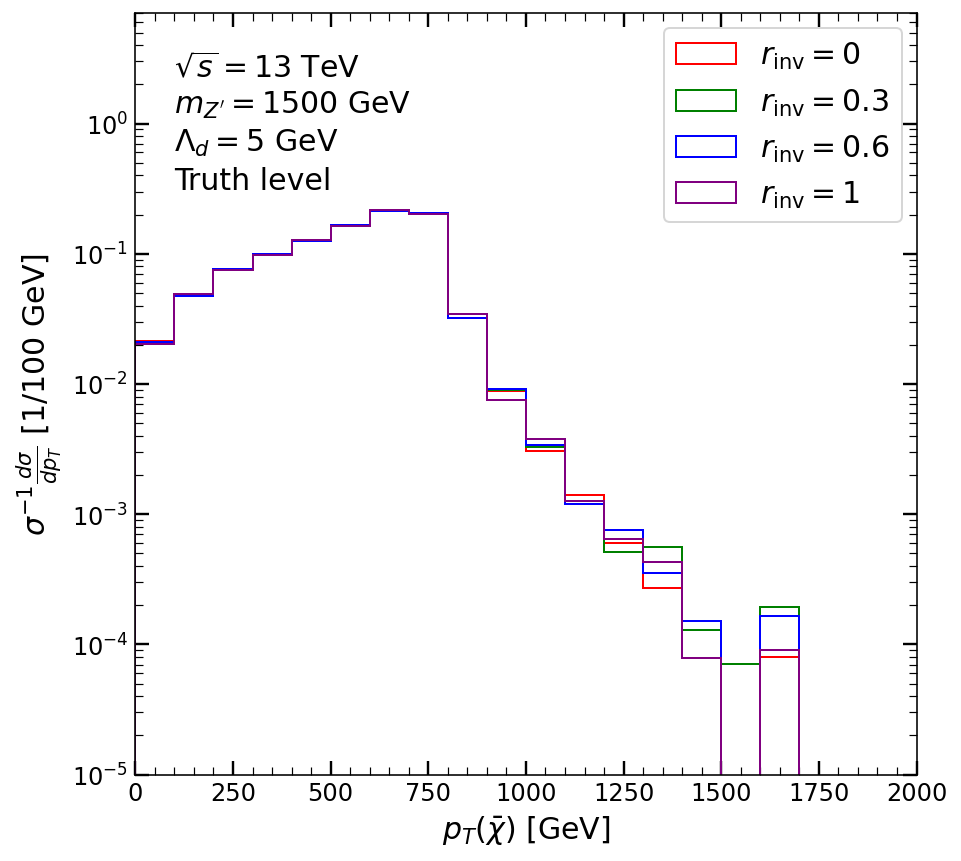

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [22]:
# 7. p_T(xdx)
hist, bins = plotting('pT_xdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(\bar{\chi})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 7),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_07-pT_xdx.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

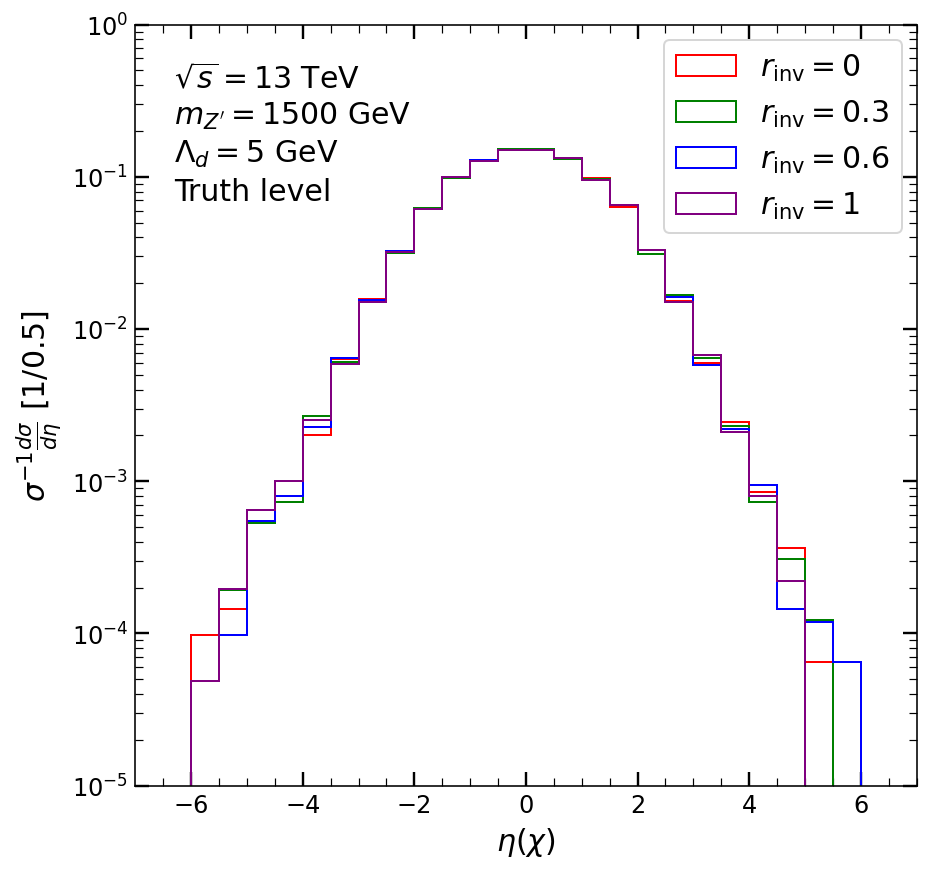

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [23]:
# 8. \eta(xd)
hist, bins = plotting('eta_xd', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(\chi)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-7, 7), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_08-eta_xd.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

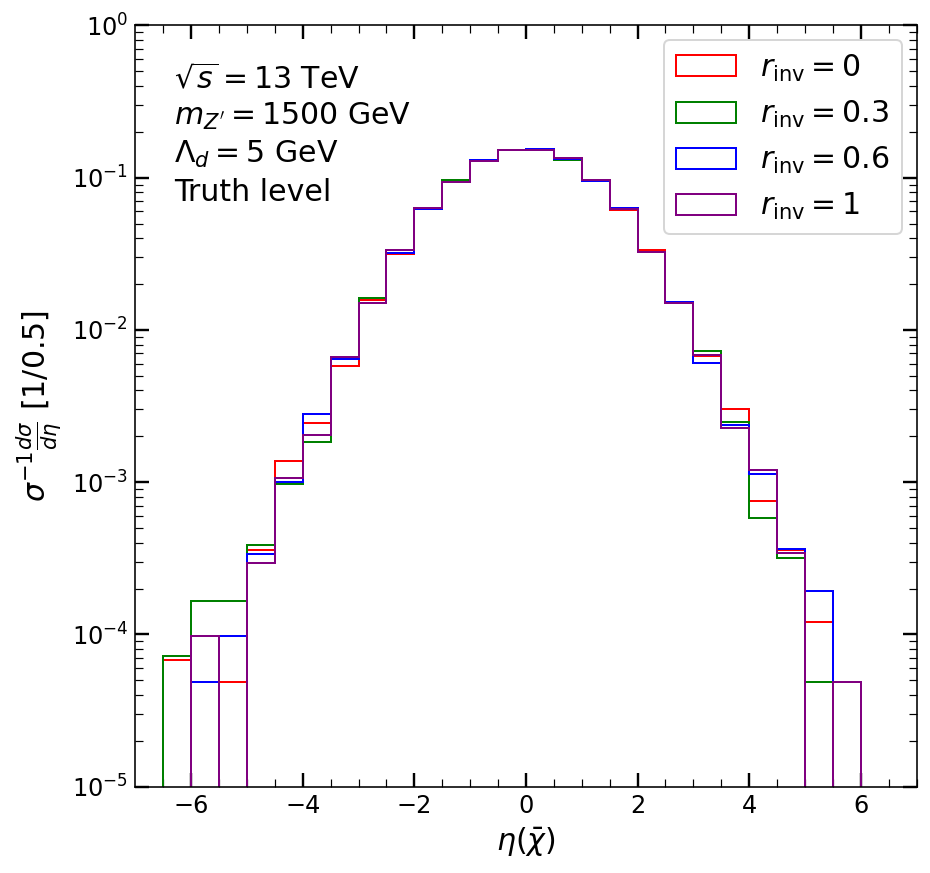

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [24]:
# 9. \eta(xdx)
hist, bins = plotting('eta_xdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(\bar{\chi})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-7, 7), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_09-eta_xdx.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

### 3-2. Jet and MET in the truth level
* $N_\mathrm{jet}$
* $p_T(j_1),\ p_T(j_2),\ p_T(j_3),\ p_T(j_4)$
* $\eta(j_1),\ \eta(j_2),\ \eta(j_3),\ \eta(j_4)$
* $\phi(j_1),\ \phi(j_2),\ \phi(j_3),\ \phi(j_4)$
* $\vec{\cancel{E}}_T$, $\phi(\vec{\cancel{E}}_T)$
* $\Delta\phi(j_1, \cancel{E}_T),\ \Delta\phi(j_2, \cancel{E}_T)$
$,\ \Delta\phi(j_3, \cancel{E}_T),\ \Delta\phi(j_4, \cancel{E}_T)$
* $\min_j\left[\Delta\phi(j, \cancel{E}_T)\right]$

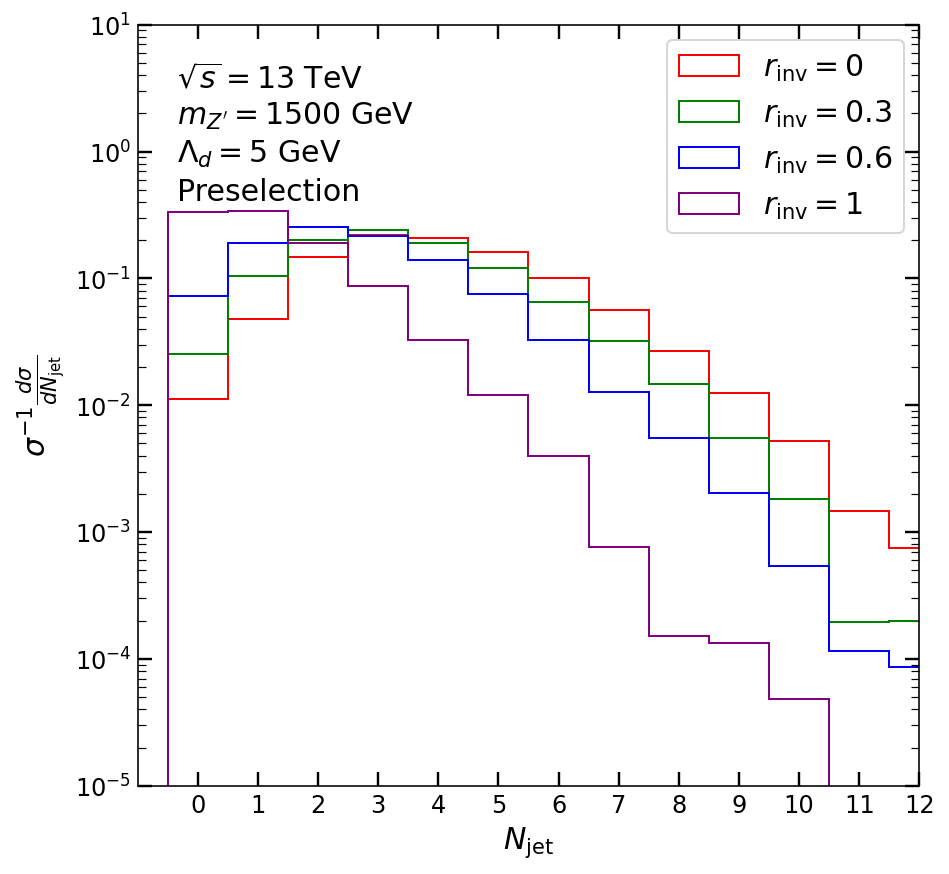

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [25]:
# 10. N_jet
hist, bins = plotting('N_jet', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      np.linspace(0, 20, 21), color, label,
                      weight=weight_normalized, selected=selected_all,
                      align='left', where='mid',
                      check_normalized_to_1=False,
                      weight_normal=weight,
                      set_title=None,
                      xlabel=r'$N_\mathrm{jet}$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dN_\mathrm{jet}}$',
                      yscale='log',
                      xmajor_locator=MultipleLocator(1),
                      xminor_locator=MultipleLocator(1),
                      ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-0.99, 12), ylim=(1/100000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_10-N_jet.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

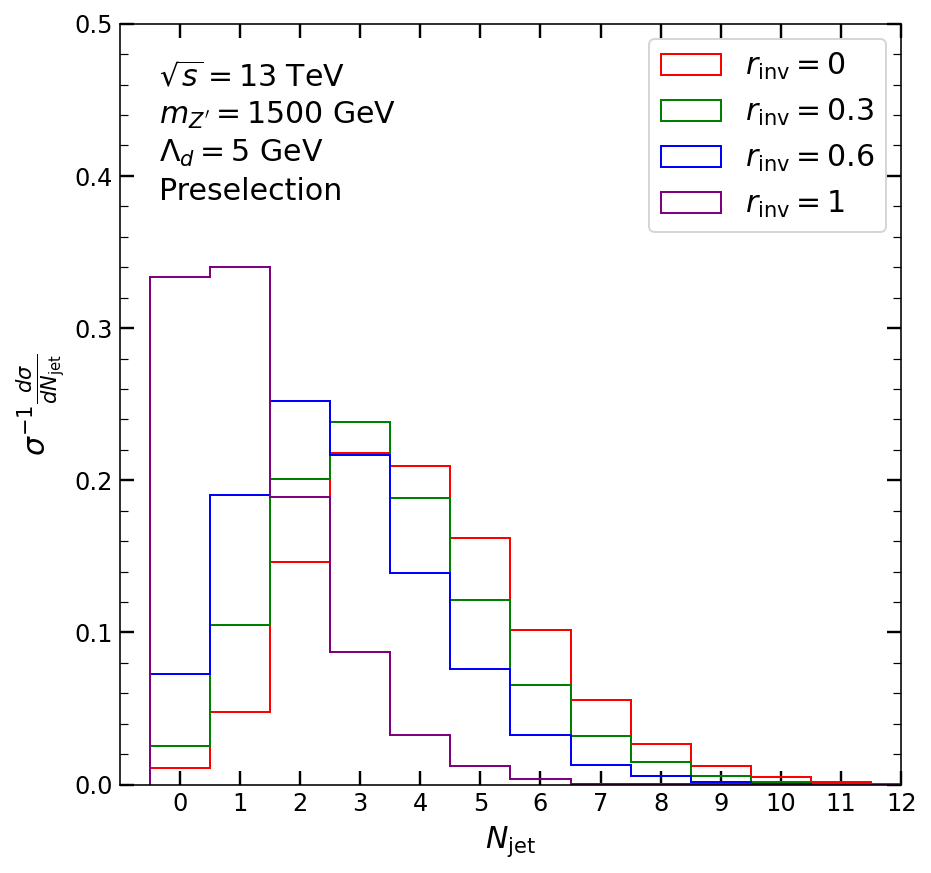

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [26]:
# 10. N_jet without log scale
hist, bins = plotting('N_jet', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      np.linspace(0, 20, 21), color, label,
                      weight=weight_normalized, selected=selected_all,
                      align='left', where='mid',
                      check_normalized_to_1=False,
                      weight_normal=weight,
                      set_title=None,
                      xlabel=r'$N_\mathrm{jet}$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dN_\mathrm{jet}}$',
                      xmajor_locator=MultipleLocator(1),
                      xminor_locator=MultipleLocator(1),
                      xlim=(-0.99, 12), ylim=(0, 0.5),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_10-N_jet-wo_log.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

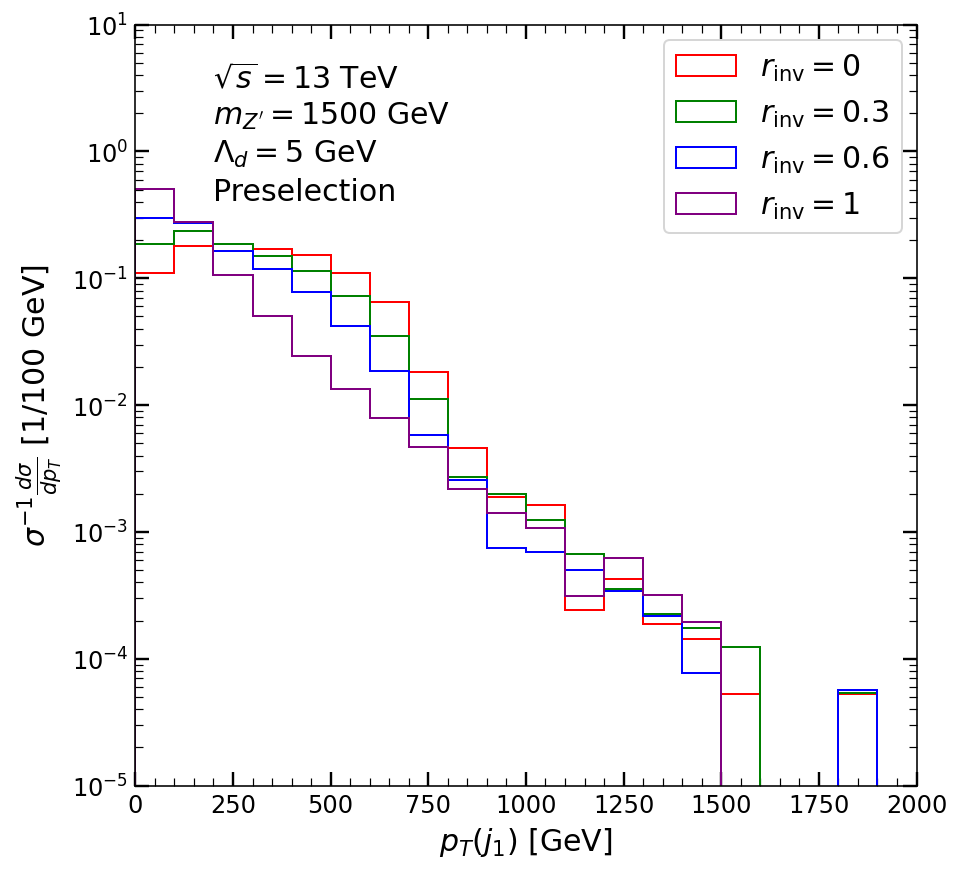

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [27]:
# 11. p_T(j_1)
hist, bins = plotting('pT_1', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_1)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text, text_xy=(0.1, 0.93),
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_11-pT_1.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

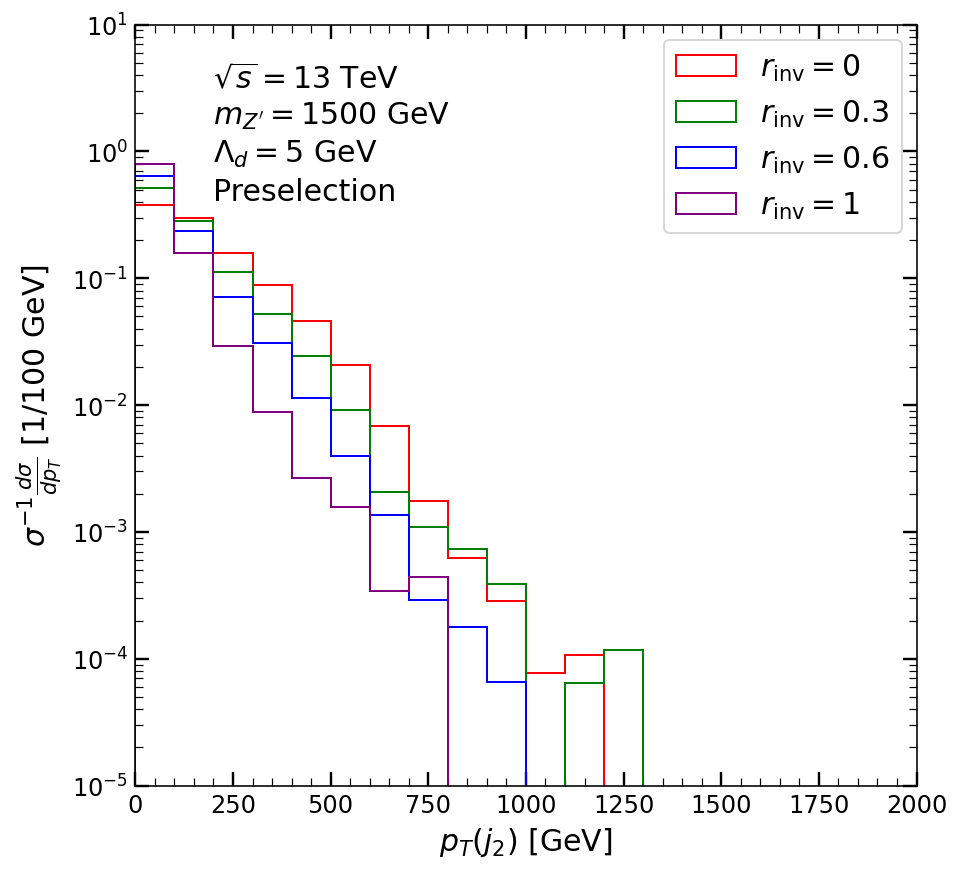

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [28]:
# 12. p_T(j_2)
hist, bins = plotting('pT_2', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_j2_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_2)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text, text_xy=(0.1, 0.93),
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_12-pT_2.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

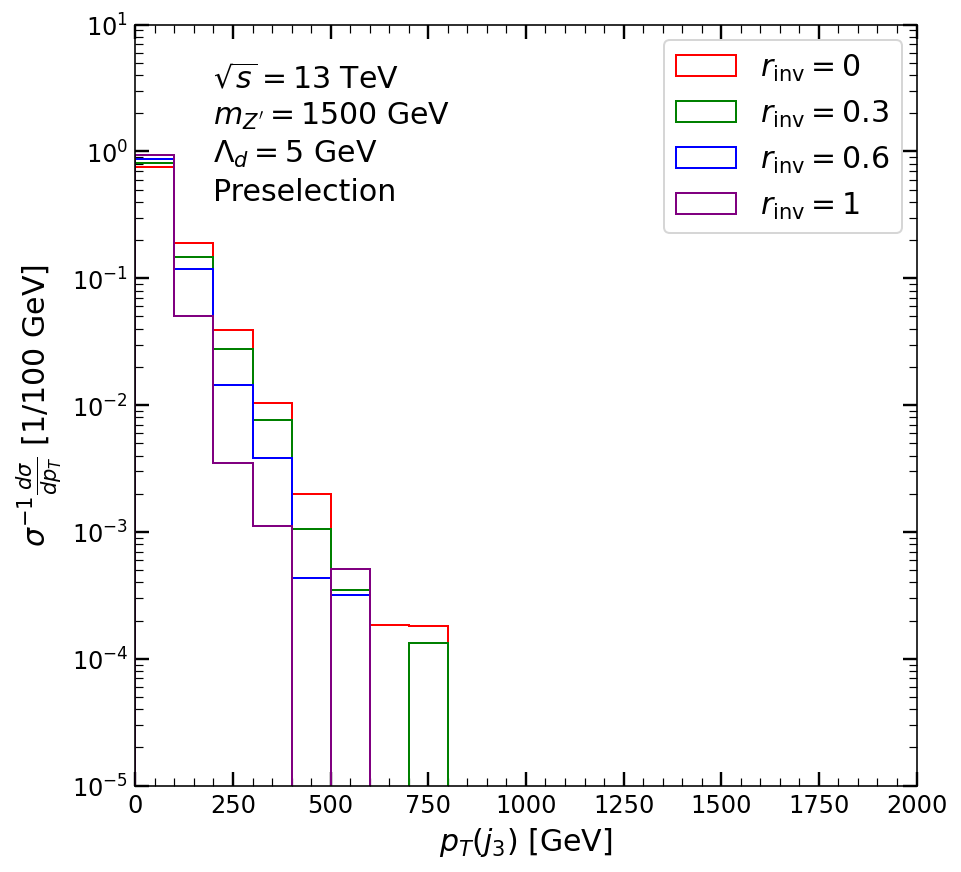

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [29]:
# 13. p_T(j_3)
hist, bins = plotting('pT_3', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_j3_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_3)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text, text_xy=(0.1, 0.93),
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_13-pT_3.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

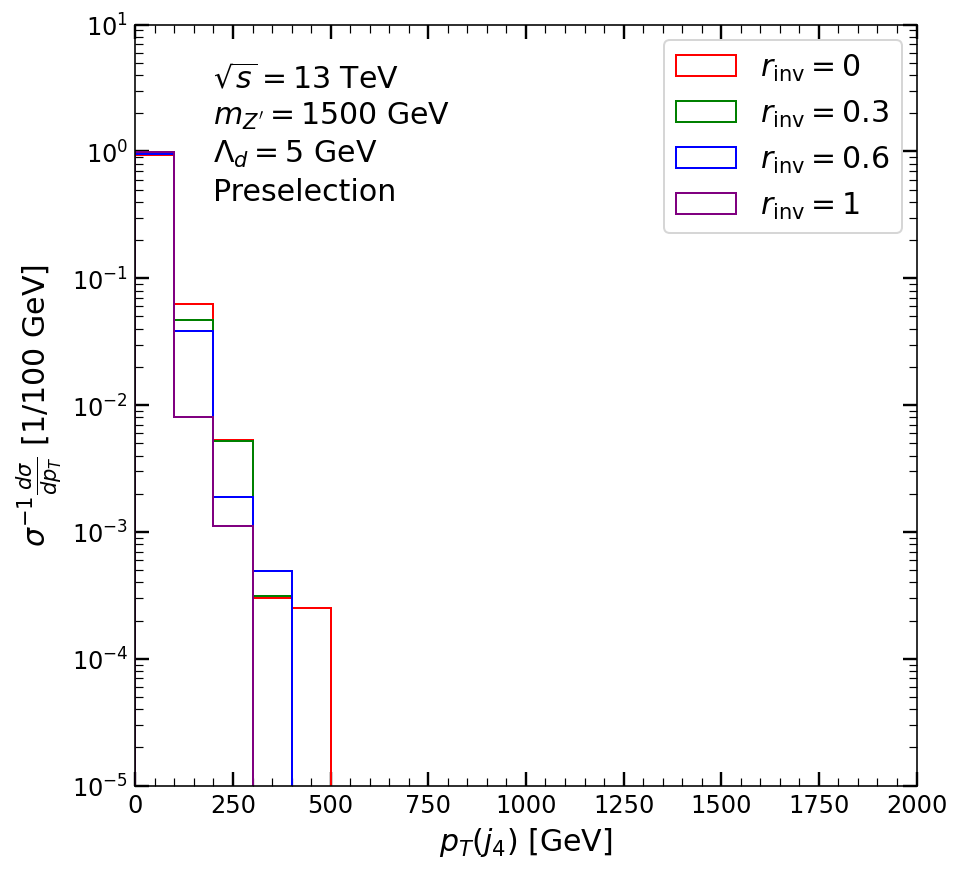

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [30]:
# 14. p_T(j_4)
hist, bins = plotting('pT_4', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_j4_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_4)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text, text_xy=(0.1, 0.93),
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_14-pT_4.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

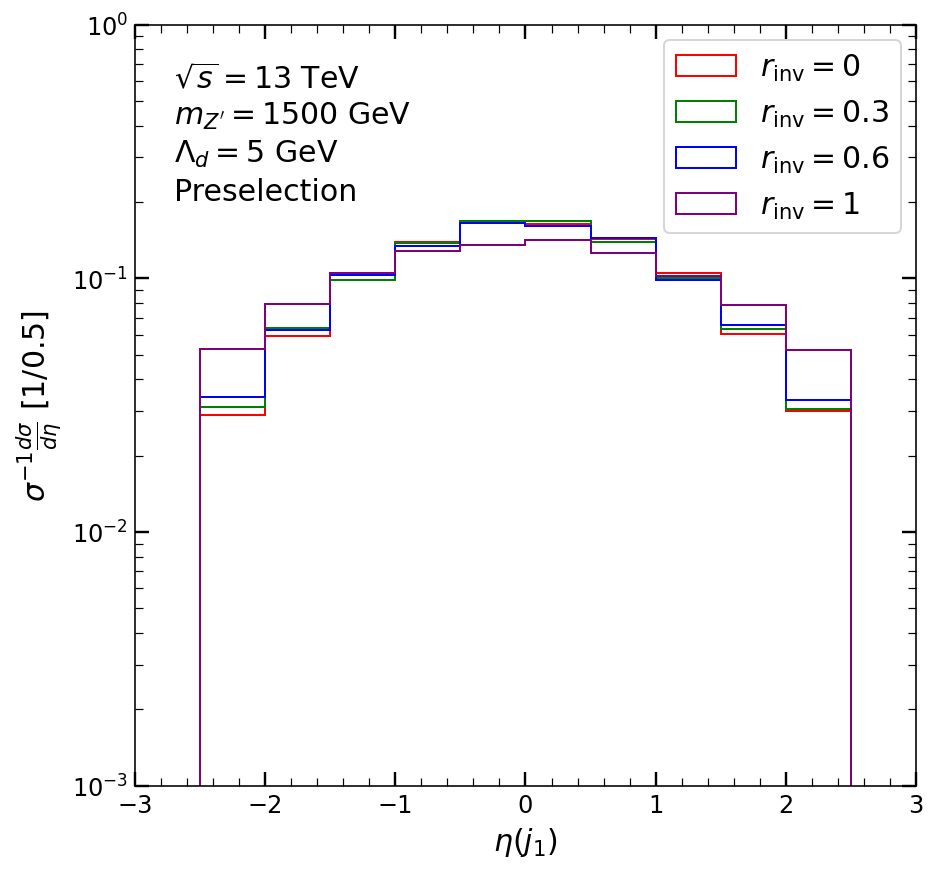

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [31]:
# 15. \eta(j_1)
hist, bins = plotting('eta_1', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_1)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_15-eta_1.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

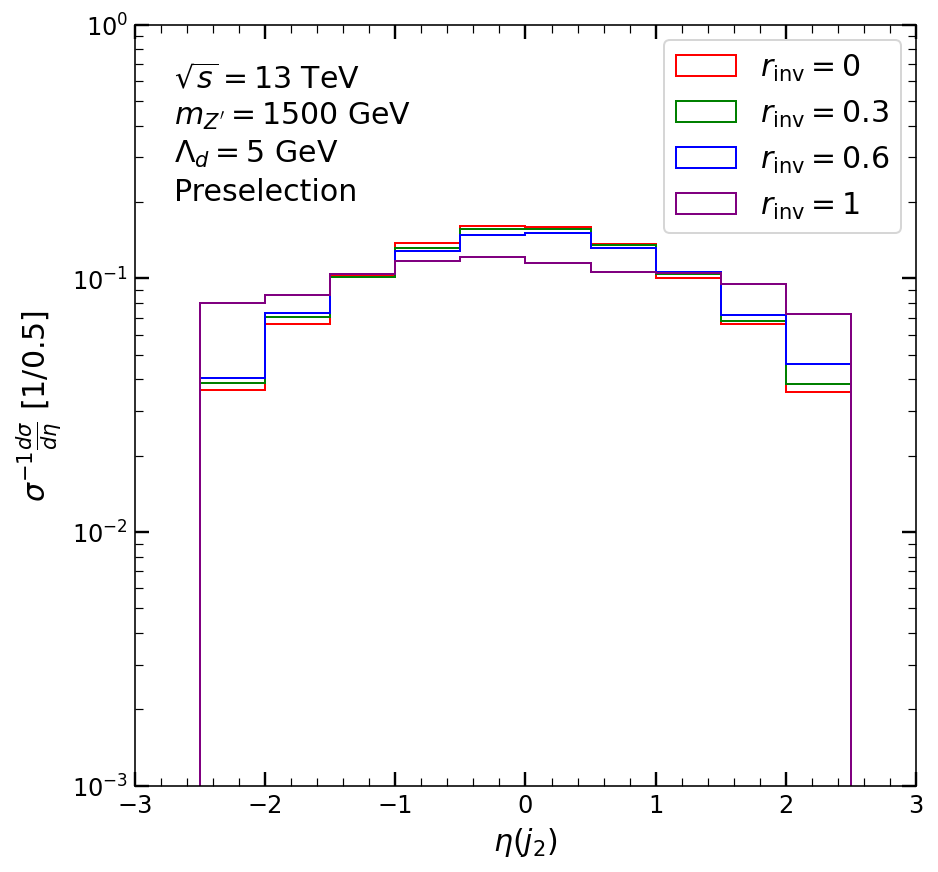

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [32]:
# 16. \eta(j_2)
hist, bins = plotting('eta_2', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_j2_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_2)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_16-eta_2.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

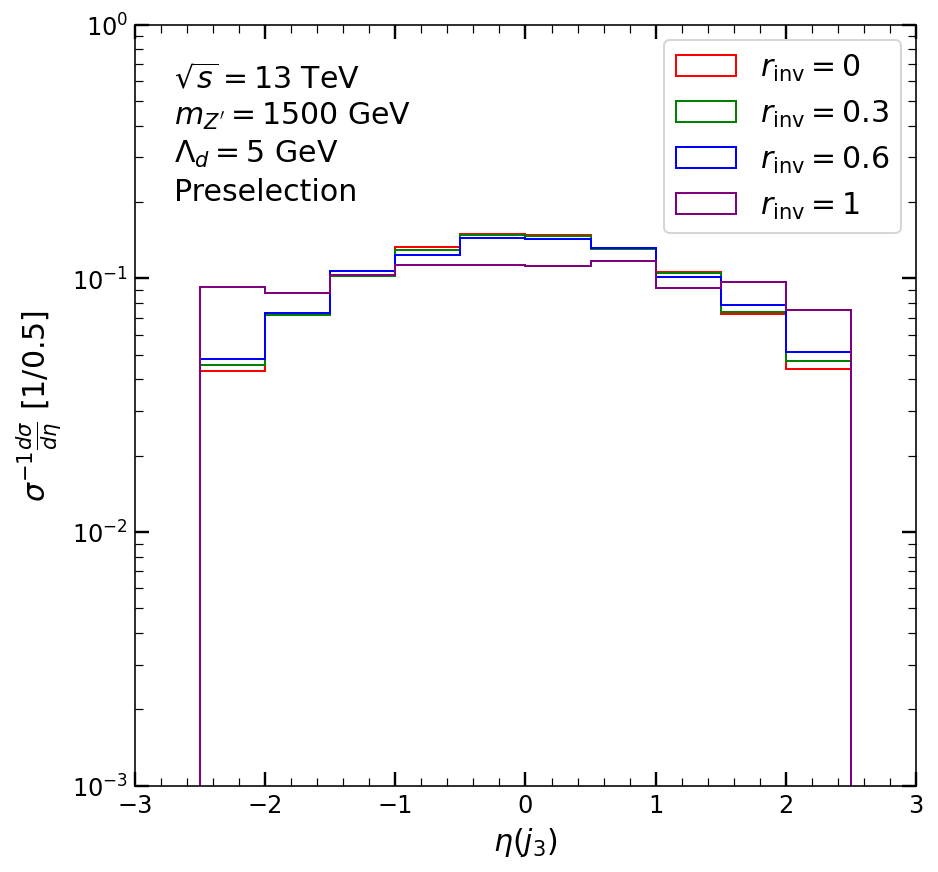

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [33]:
# 17. \eta(j_3)
hist, bins = plotting('eta_3', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_j3_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_3)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_17-eta_3.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

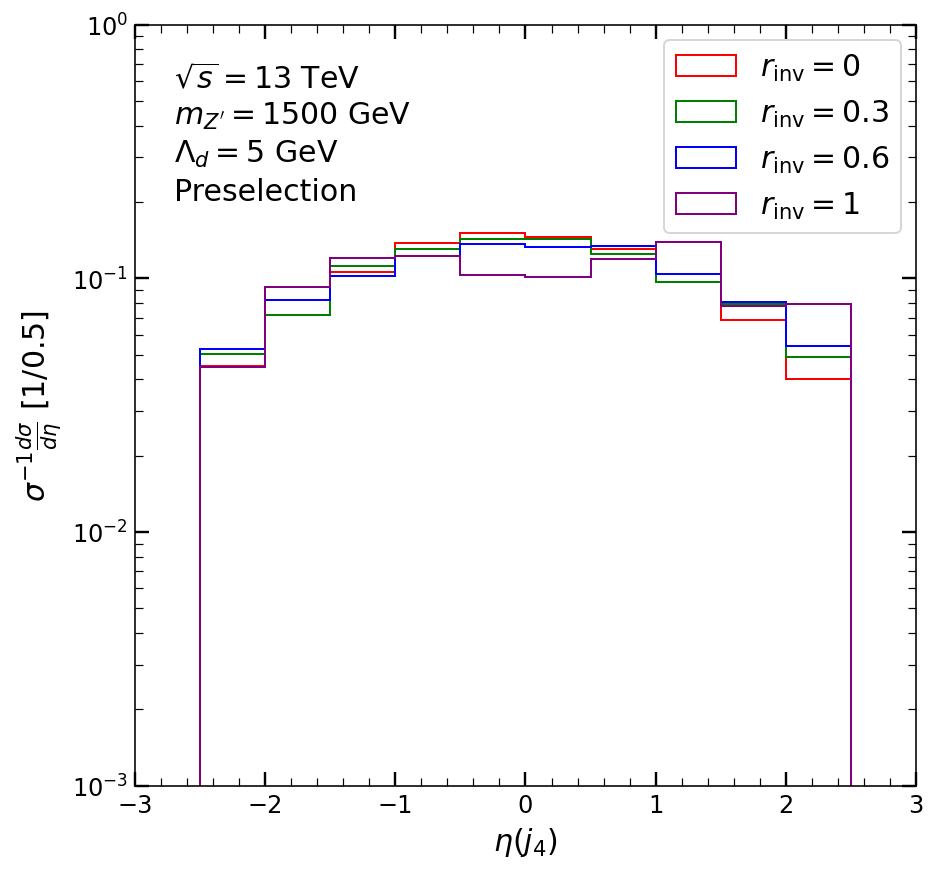

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [34]:
# 18. \eta(j_4)
hist, bins = plotting('eta_4', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_j4_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_4)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_18-eta_4.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

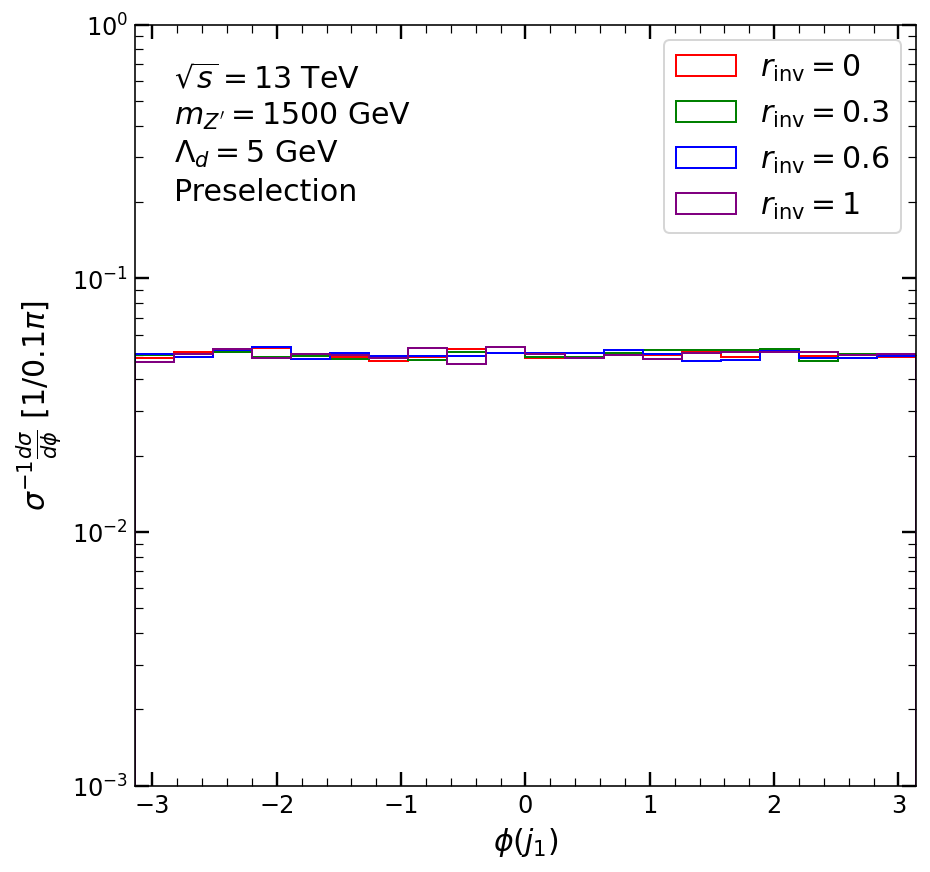

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [35]:
# 19. \phi(j_1)
hist, bins = plotting('phi_1', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(j_1)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_19-phi_1.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

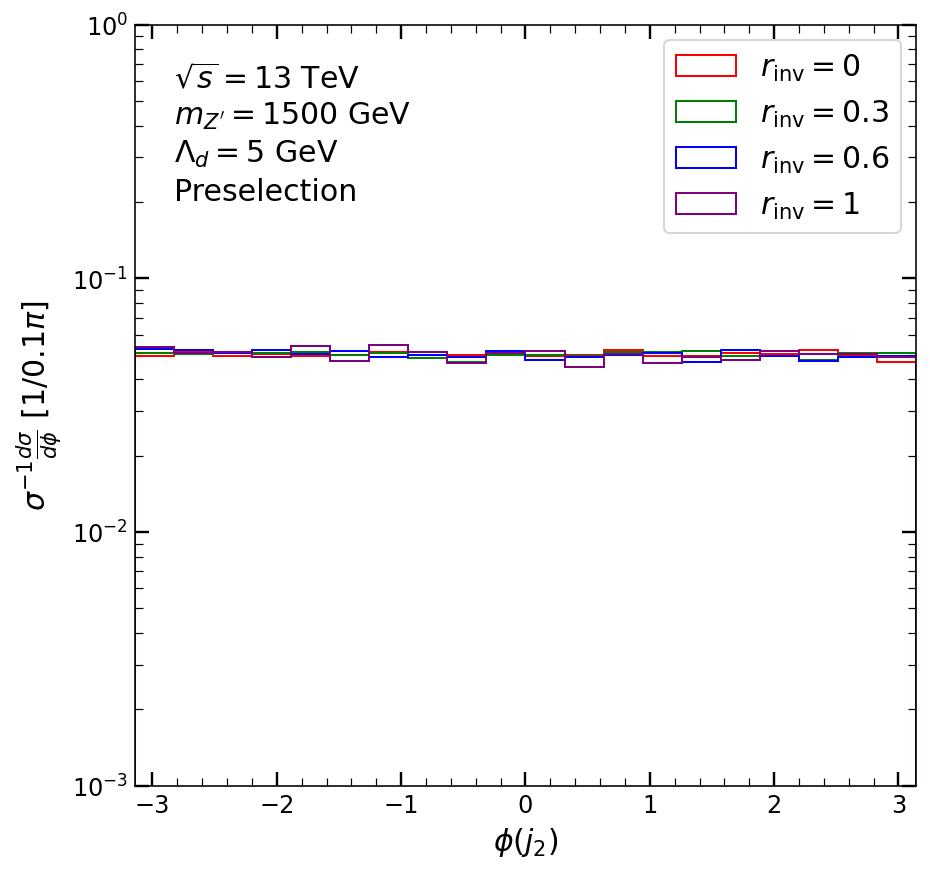

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [36]:
# 20. \phi(j_2)
hist, bins = plotting('phi_2', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_j2_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(j_2)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_20-phi_2.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

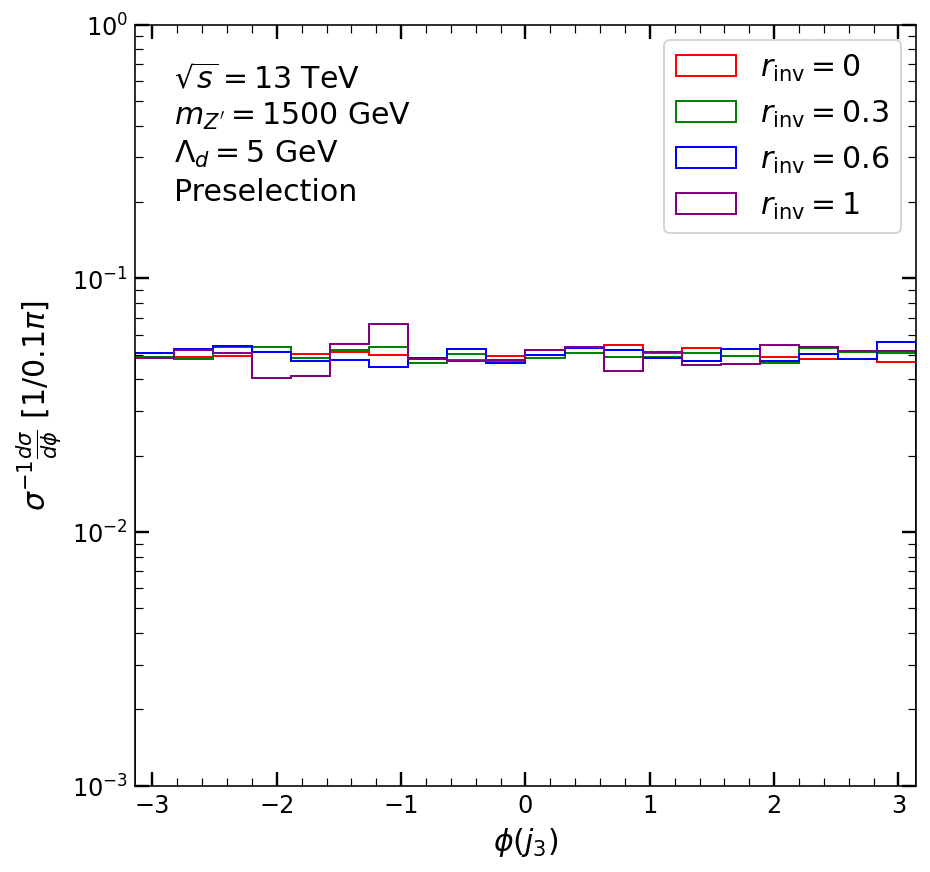

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [37]:
# 21. \phi(j_3)
hist, bins = plotting('phi_3', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_j3_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(j_3)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_21-phi_3.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

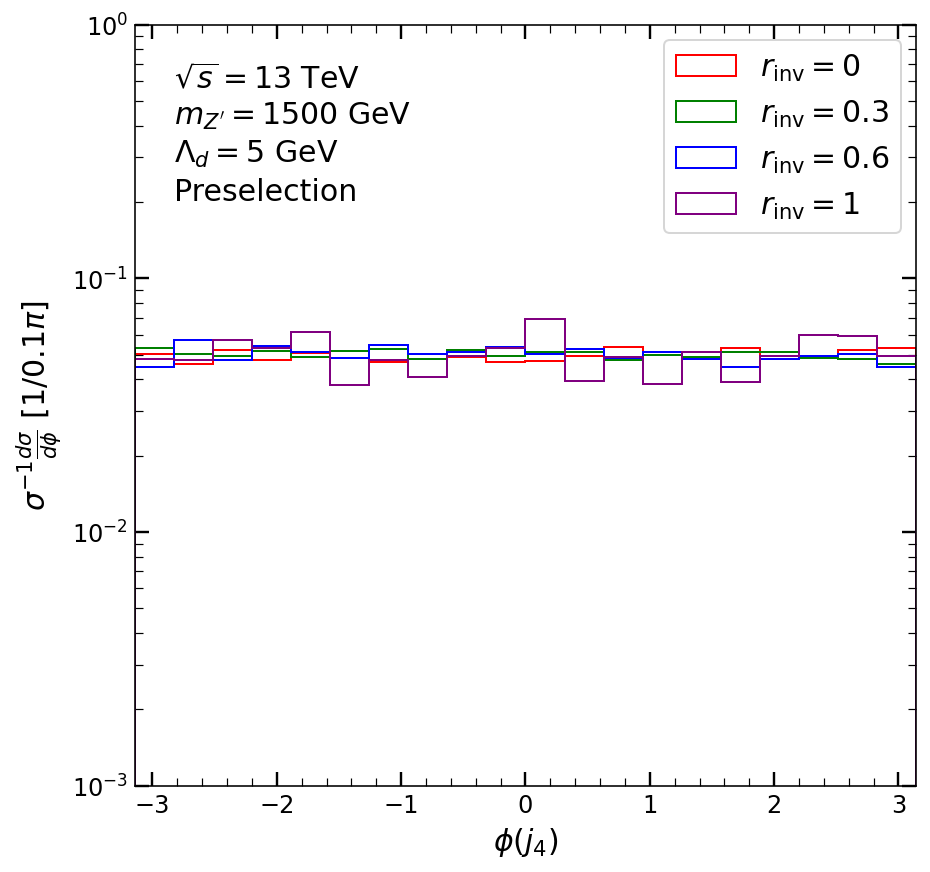

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [38]:
# 22. \phi(j_4)
hist, bins = plotting('phi_4', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_j4_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(j_4)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_22-phi_4.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

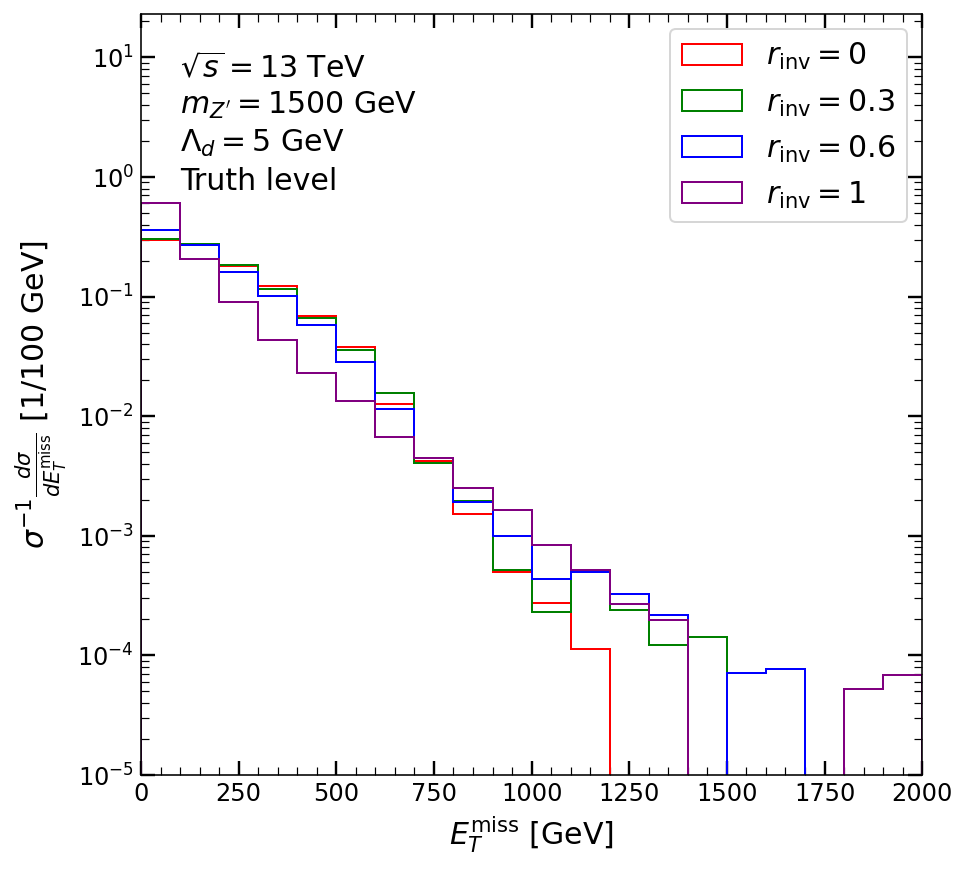

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [39]:
# 23. MET
hist, bins = plotting('MET', [dataset[i+3] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$E_T^\mathrm{miss}$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dE_T^\mathrm{miss}}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 23),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_23-MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

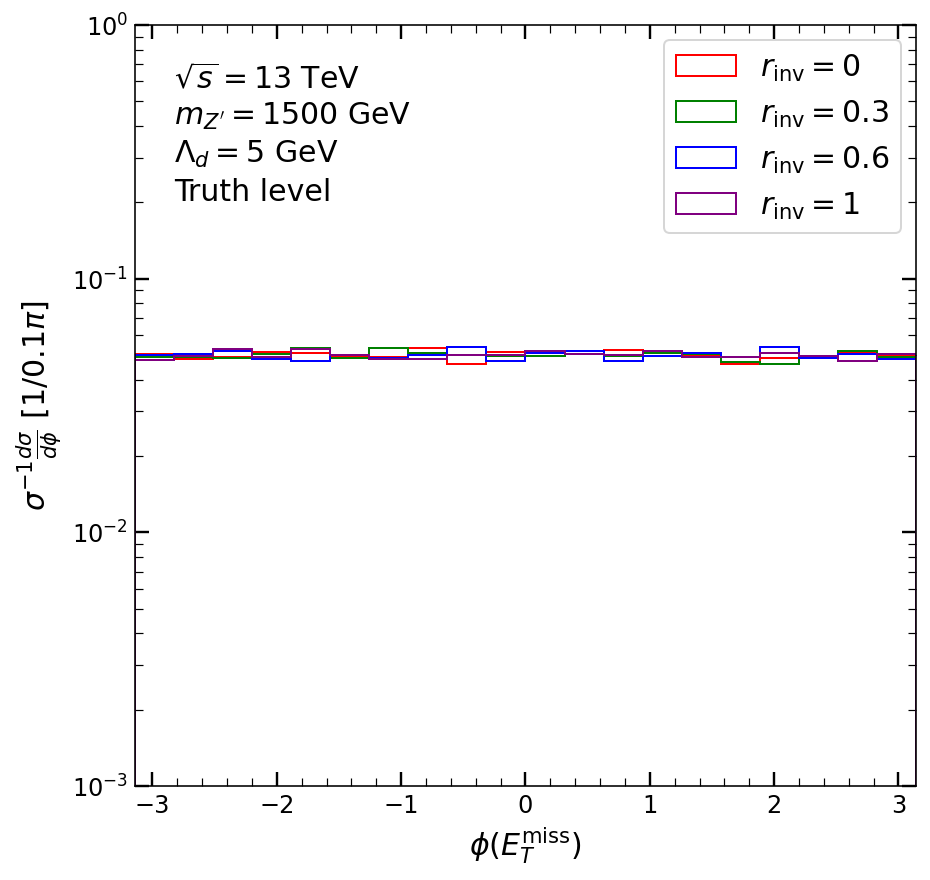

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [40]:
# 24. \phi(MET)
hist, bins = plotting('phi', [dataset[i+3] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_24-phi_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

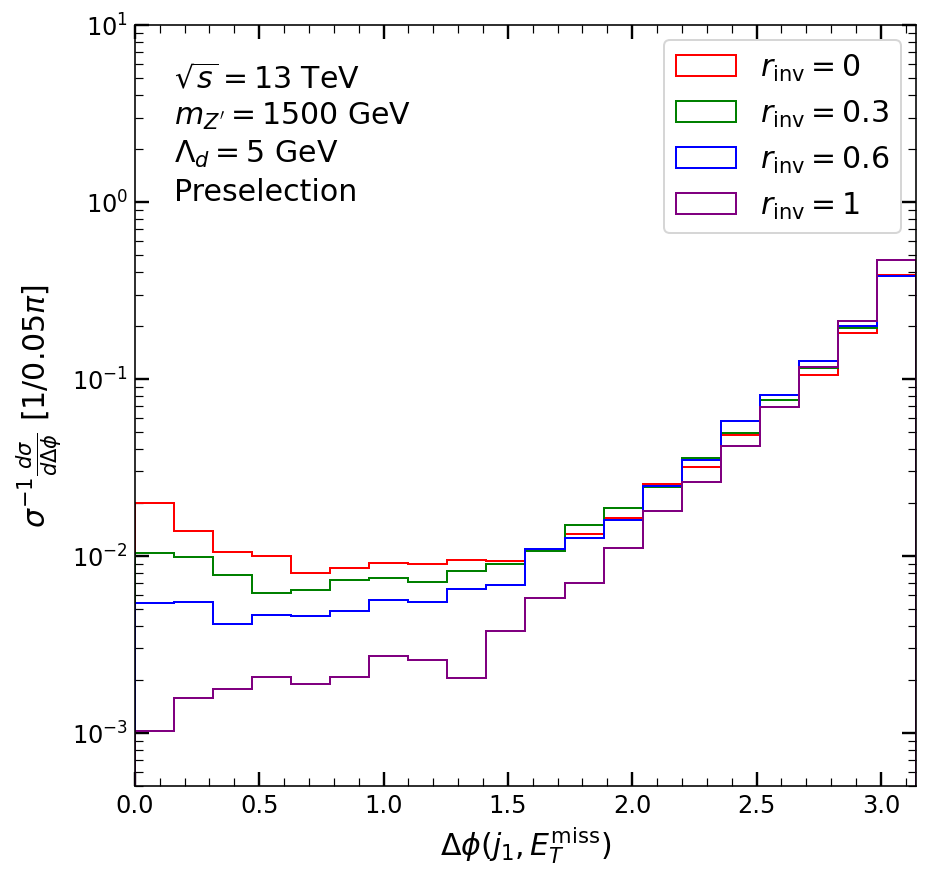

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [41]:
# 25. \Delta\phi(j_1, MET)
hist, bins = plotting('Dphi_j1_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_1, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/2000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_25-Dphi_j1_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

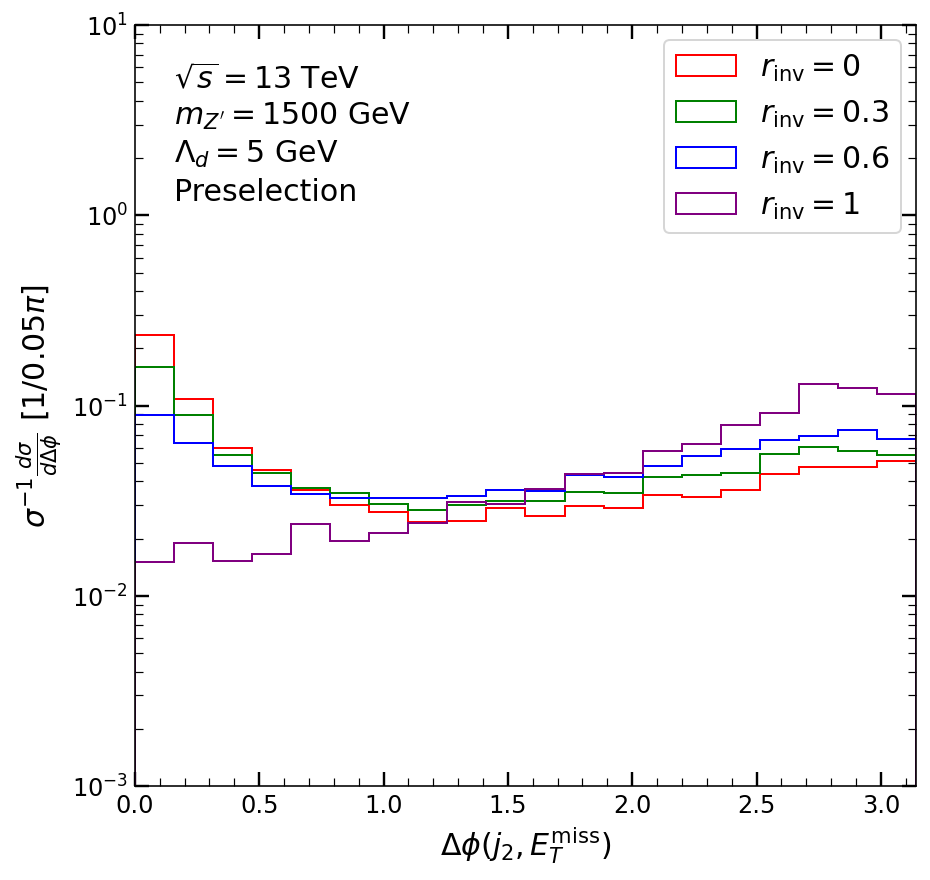

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [42]:
# 26. \Delta\phi(j_2, MET)
hist, bins = plotting('Dphi_j2_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j2_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_2, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_26-Dphi_j2_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

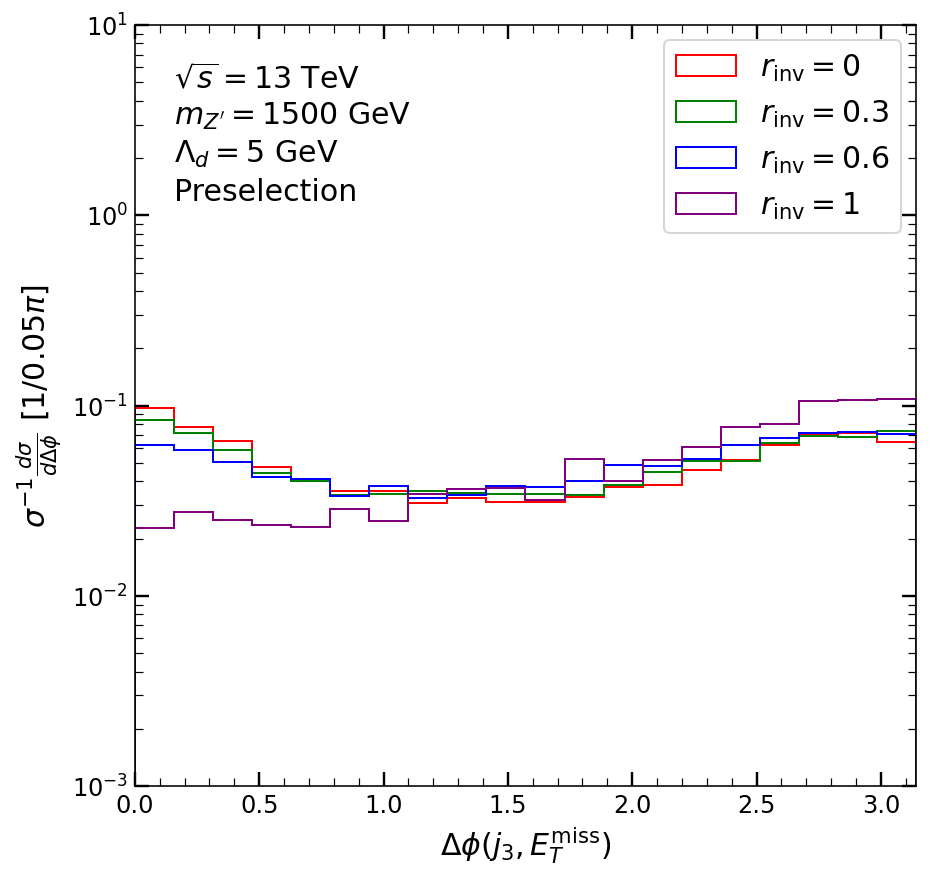

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [43]:
# 27. \Delta\phi(j_3, MET)
hist, bins = plotting('Dphi_j3_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j3_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_3, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_27-Dphi_j3_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

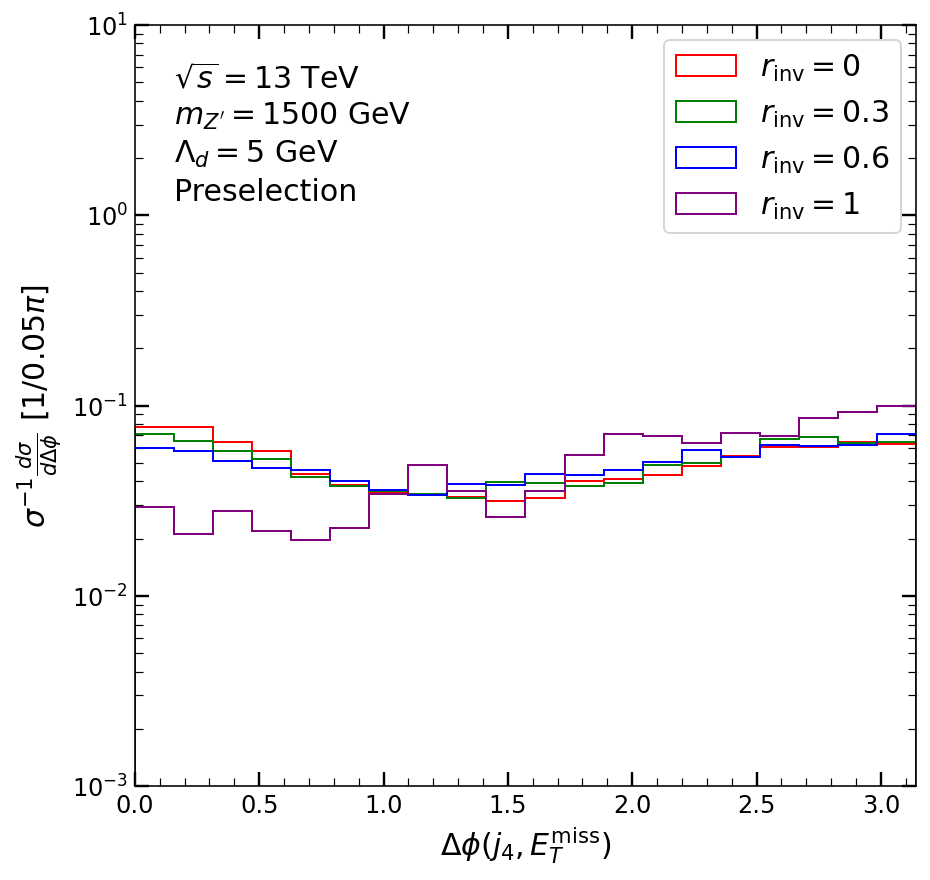

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [44]:
# 28. \Delta\phi(j_4, MET)
hist, bins = plotting('Dphi_j4_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j4_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_4, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_28-Dphi_j4_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

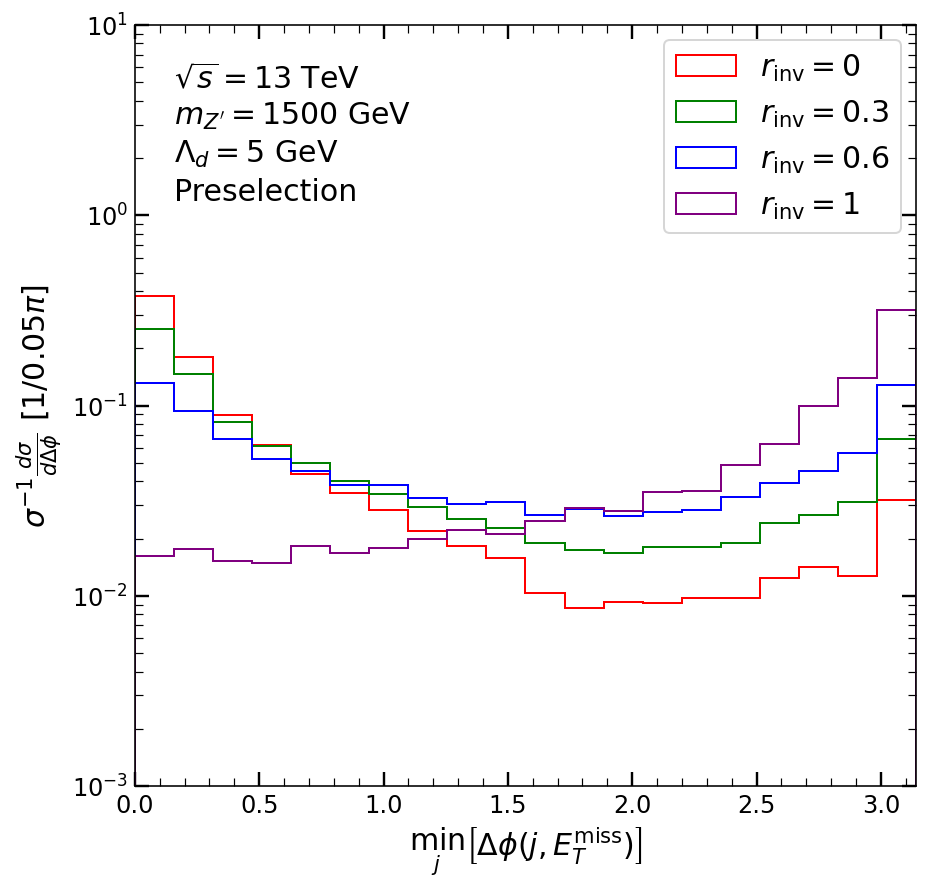

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [45]:
# 29. \min\Delta\phi(j, MET)
hist, bins = plotting('min_Dphi_j_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_j\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_29-min_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

### 3-3. Event selection $N_\mathrm{jet} \ge 2$

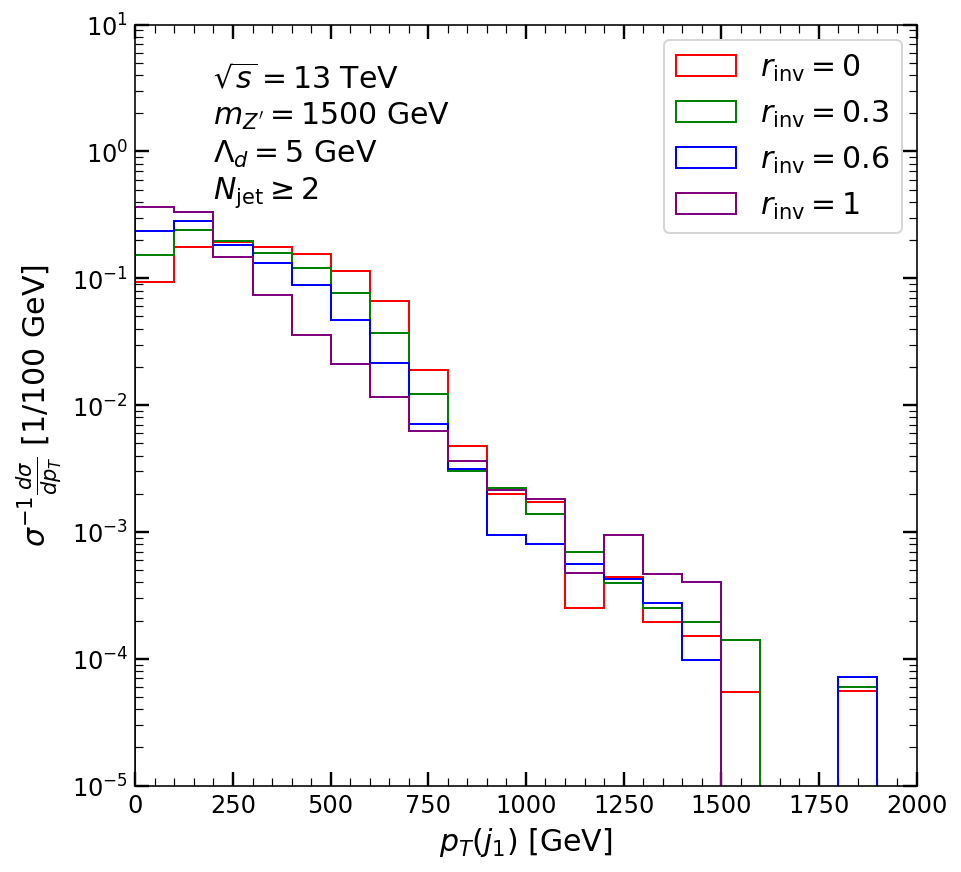

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [46]:
# 30. p_T(j_1) with N_jet >= 2
hist, bins = plotting('pT_1', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_1)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=(0.1, 0.93),
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_30-dijet-pT_1.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

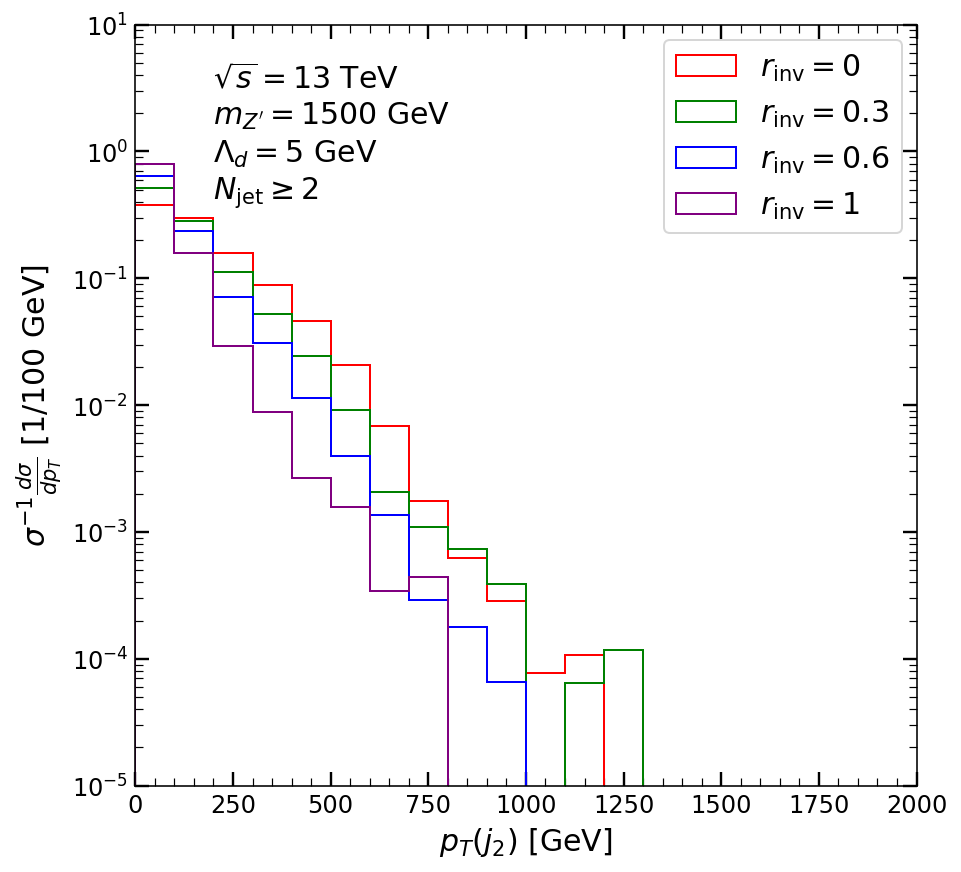

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [47]:
# 31. p_T(j_2) with N_jet >= 2
hist, bins = plotting('pT_2', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_2)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=(0.1, 0.93),
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_31-dijet-pT_2.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

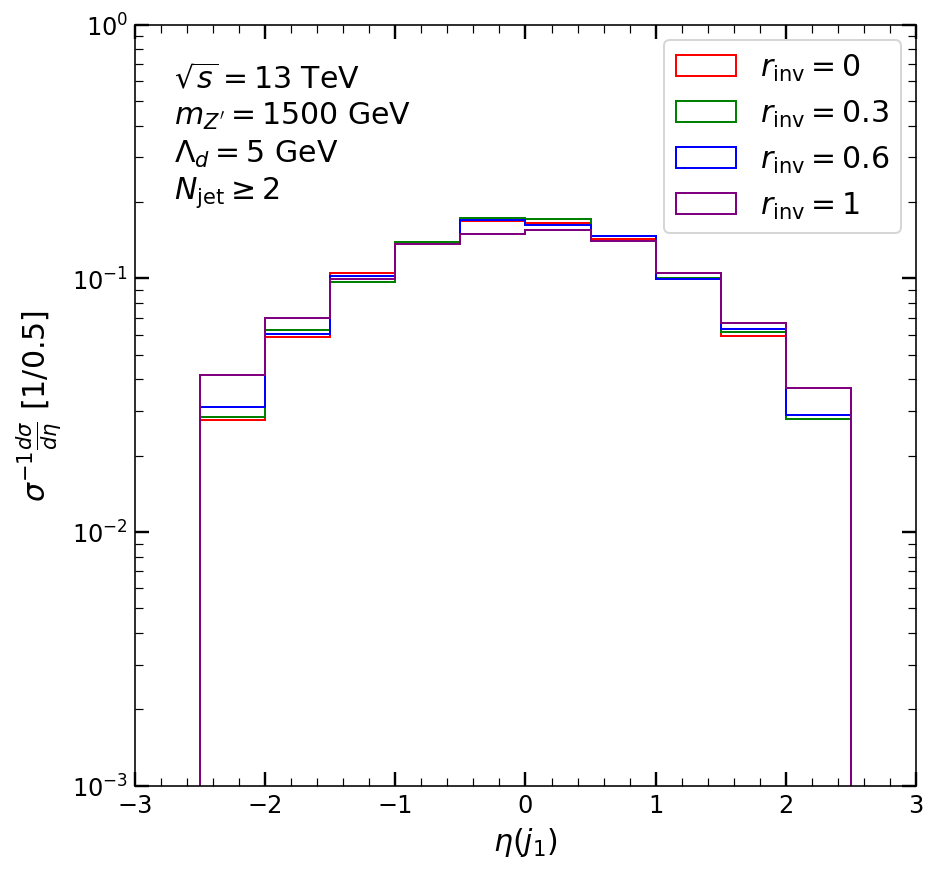

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [48]:
# 32. \eta(j_1) when N_jet >= 2
hist, bins = plotting('eta_1', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_1)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_32-dijet-eta_1.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

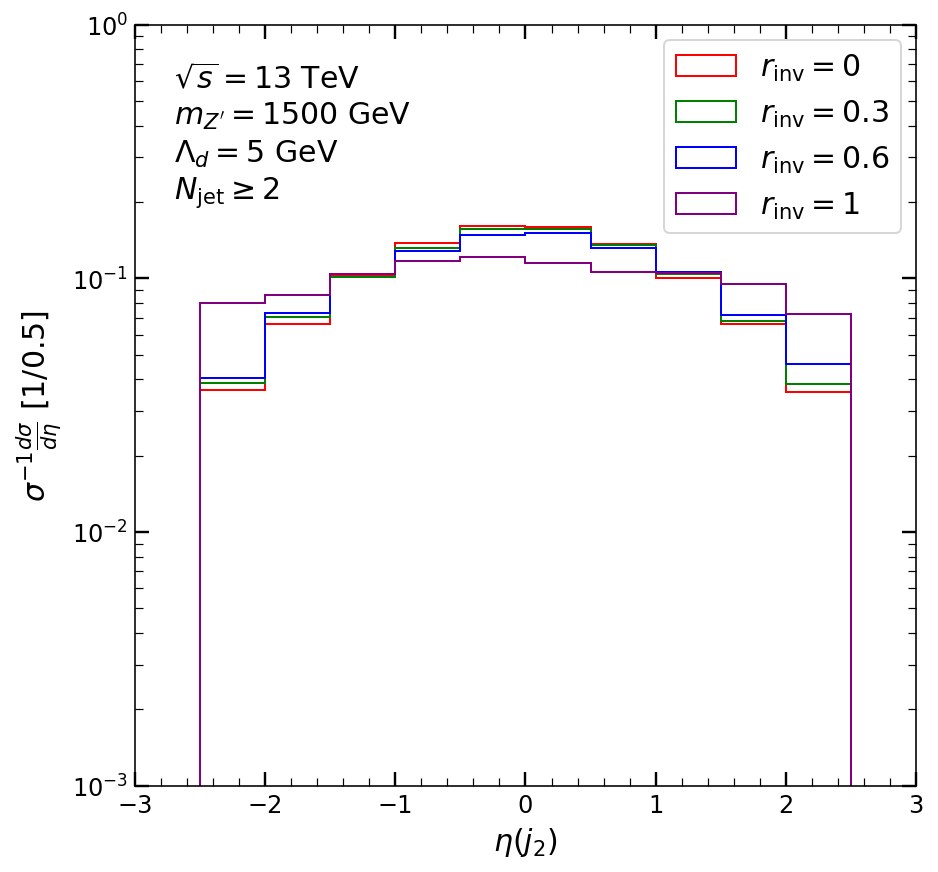

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [49]:
# 33. \eta(j_2) when N_jet >= 2
hist, bins = plotting('eta_2', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_2)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_33-dijet-eta_2.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

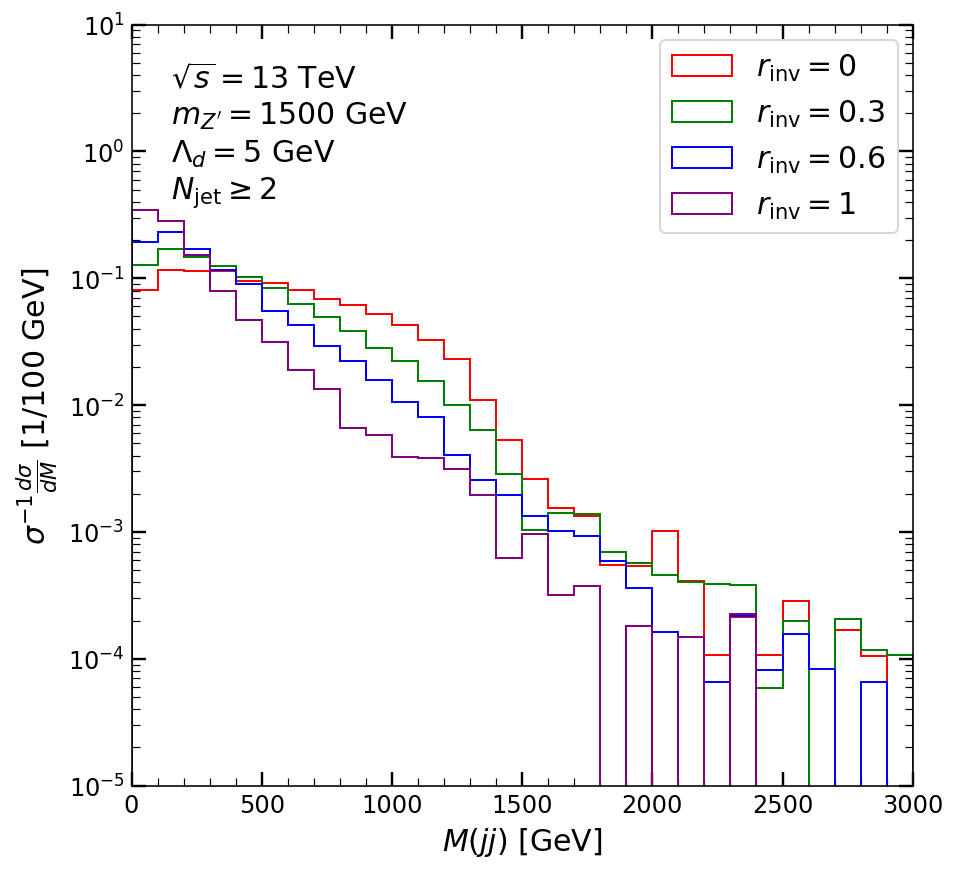

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [50]:
# 34. M(jj) when N_jet >= 2
hist, bins = plotting('M_jj', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M(jj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_34-dijet-M_jj.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

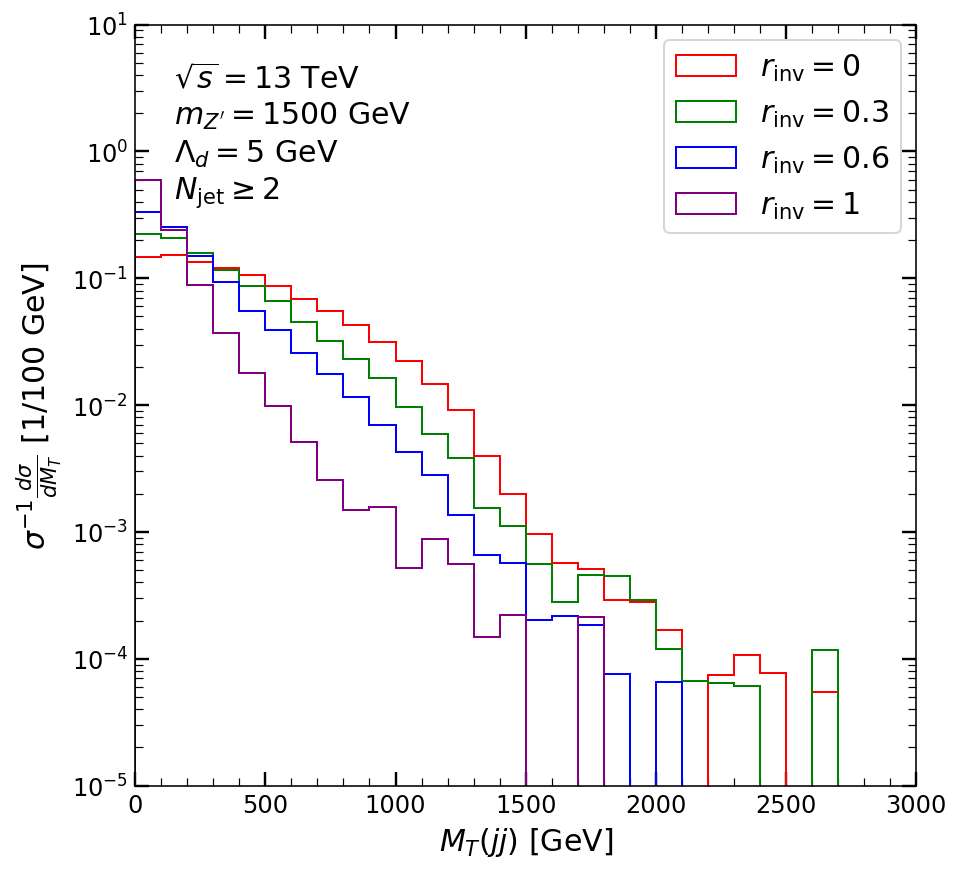

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [51]:
# 35. M_T(jj) when N_jet >= 2
hist, bins = plotting('MT_jj', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(jj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_35-dijet-MT_jj.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

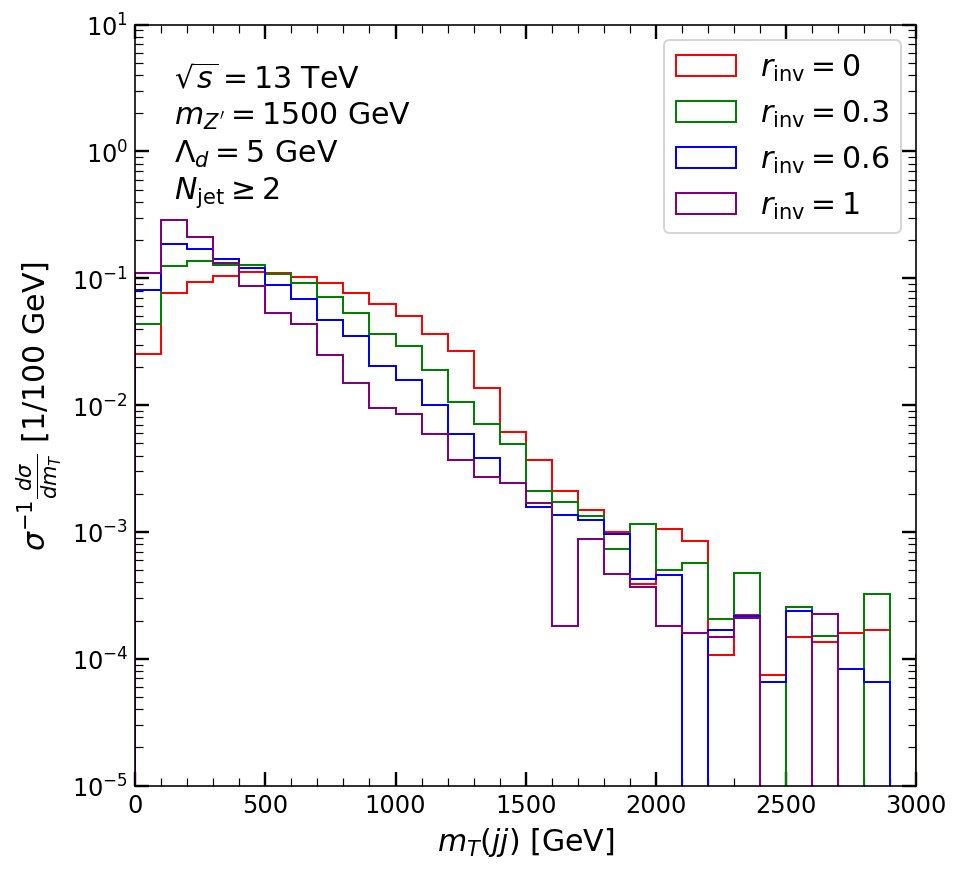

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [52]:
# 36. m_T(jj) when N_jet >= 2
hist, bins = plotting('mT_jj', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$m_T(jj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dm_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_36-dijet-mT_jj.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

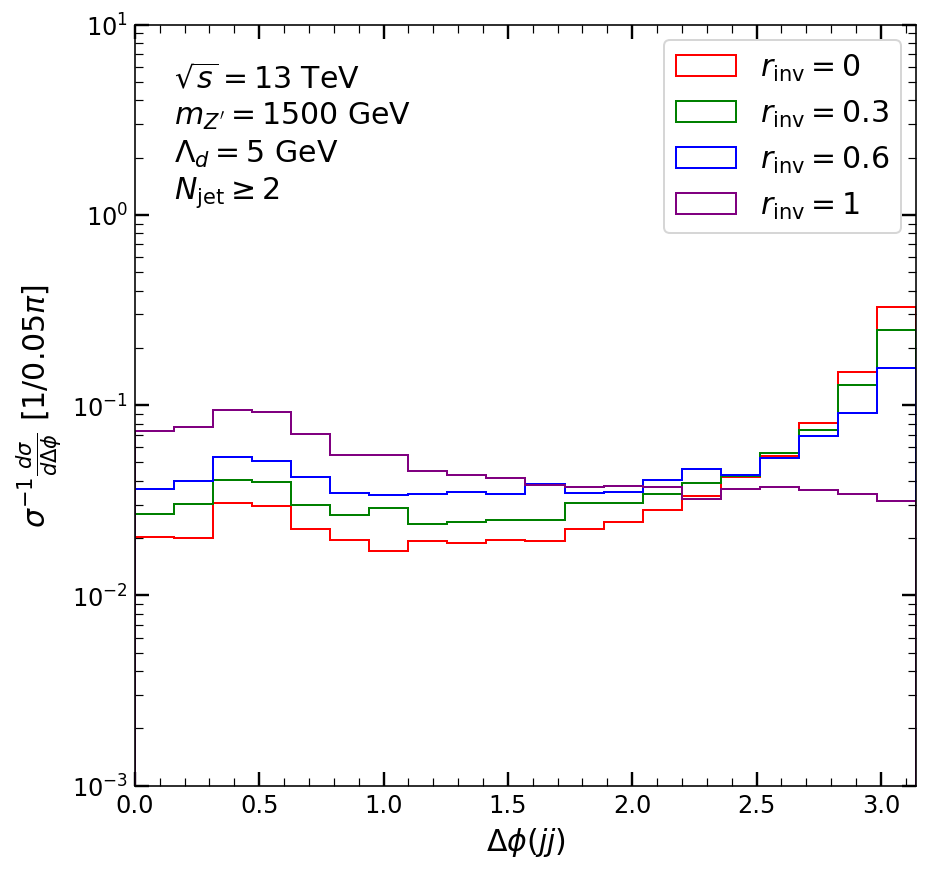

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [53]:
# 37. \Delta\phi(jj) when N_jet >= 2
hist, bins = plotting('Dphi', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(jj)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_37-dijet-Dphi.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

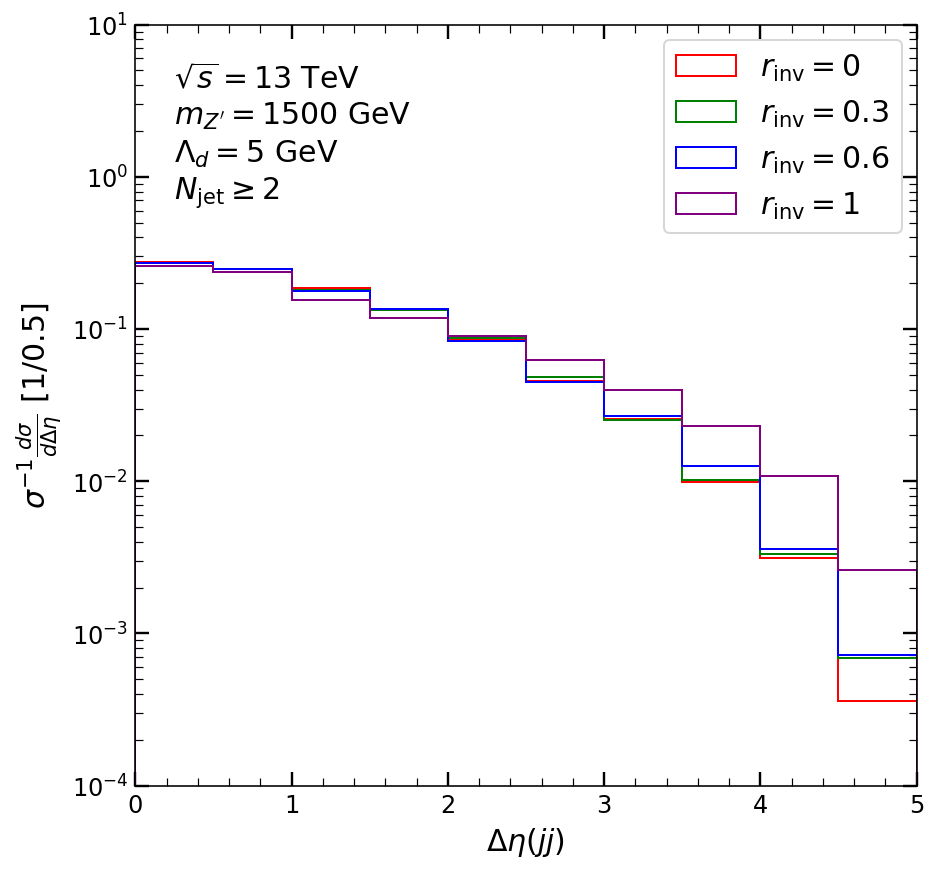

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [54]:
# 38. \Delta\eta(jj) when N_jet >= 2
hist, bins = plotting('Deta', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\eta(jj)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 5), ylim=(1/10000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_38-dijet-Deta.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

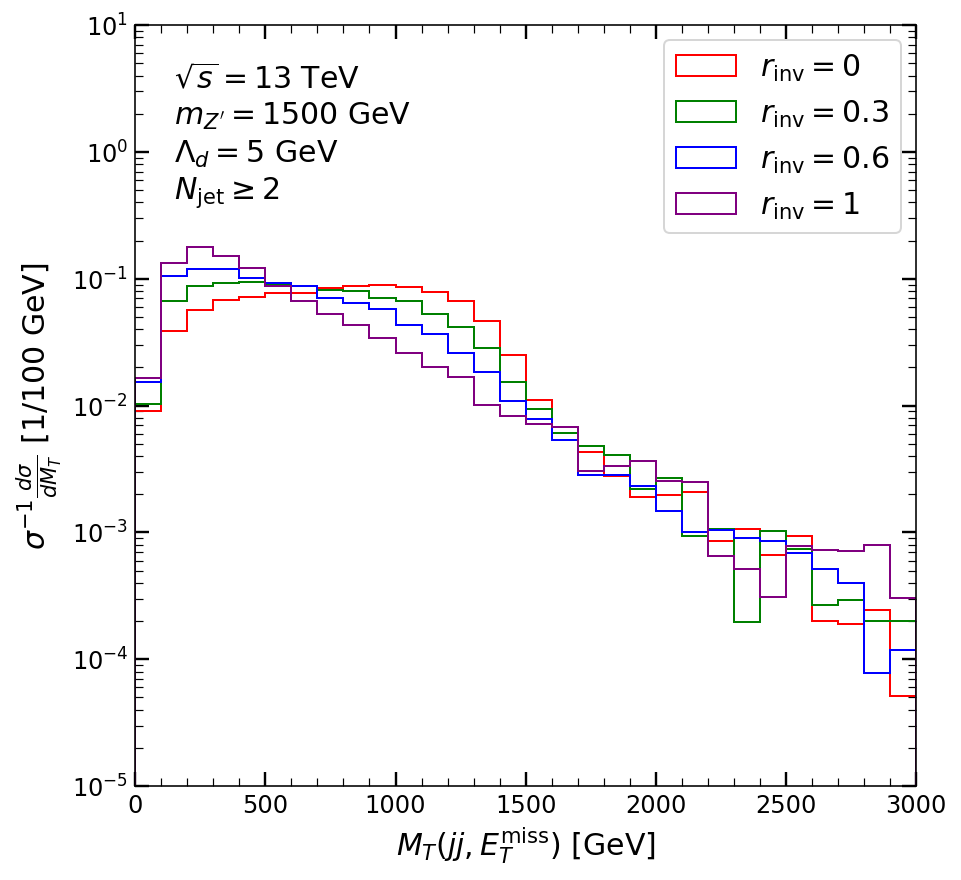

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [55]:
# 39. M_T(jj, MET) when N_jet >= 2
hist, bins = plotting('MT_jj_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(jj, E_T^\mathrm{miss})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_39-dijet-MT_jj_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

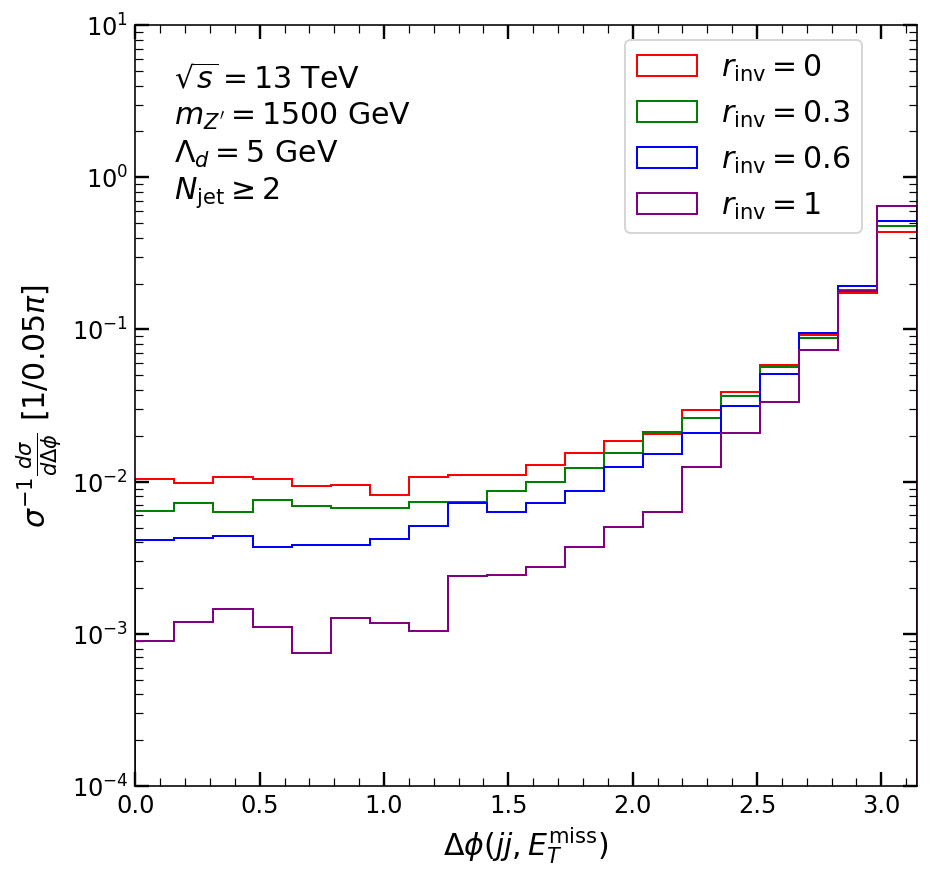

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [56]:
# 40. \Delta\phi(jj, MET) when N_jet >= 2
hist, bins = plotting('Dphi_jj_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      legend_bbox_to_anchor=(0.95, 1),
                      xlabel=r'$\Delta\phi(jj, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_40-dijet-Dphi_jj_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

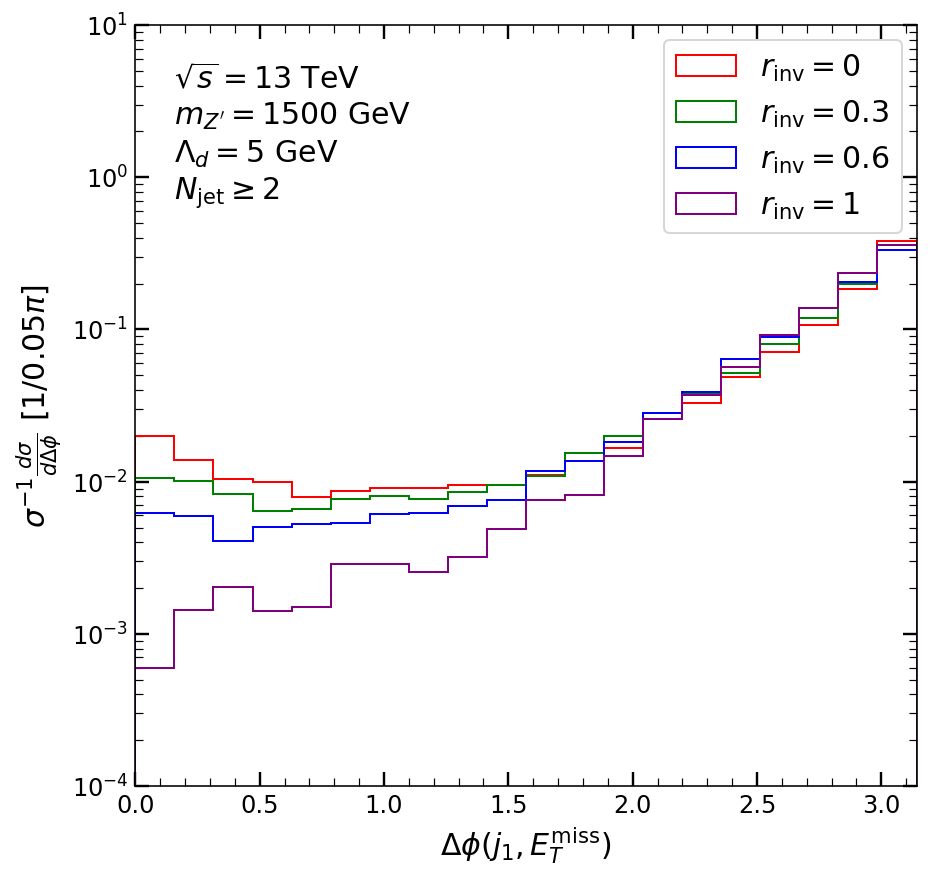

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [57]:
# 41. \Delta\phi(j_1, MET) when N_jet >= 2
hist, bins = plotting('Dphi_j1_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_1, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_41-dijet-Dphi_j1_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

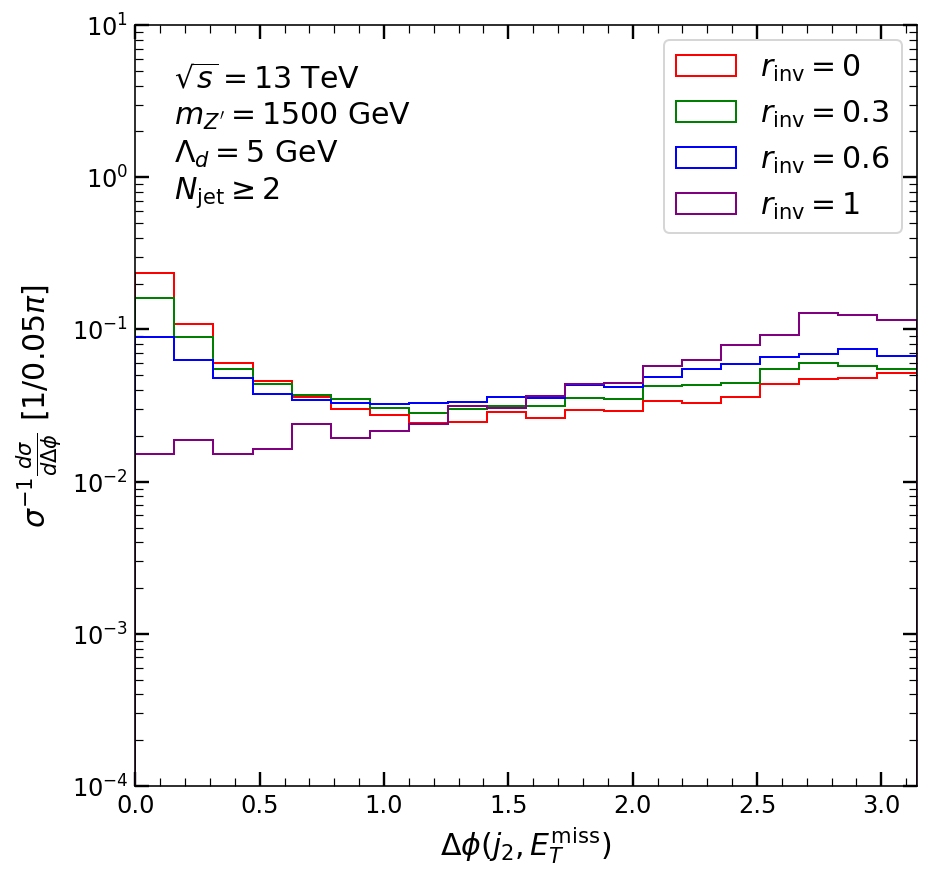

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [58]:
# 42. \Delta\phi(j_2, MET) when N_jet >= 2
hist, bins = plotting('Dphi_j2_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_2, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_42-dijet-Dphi_j2_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

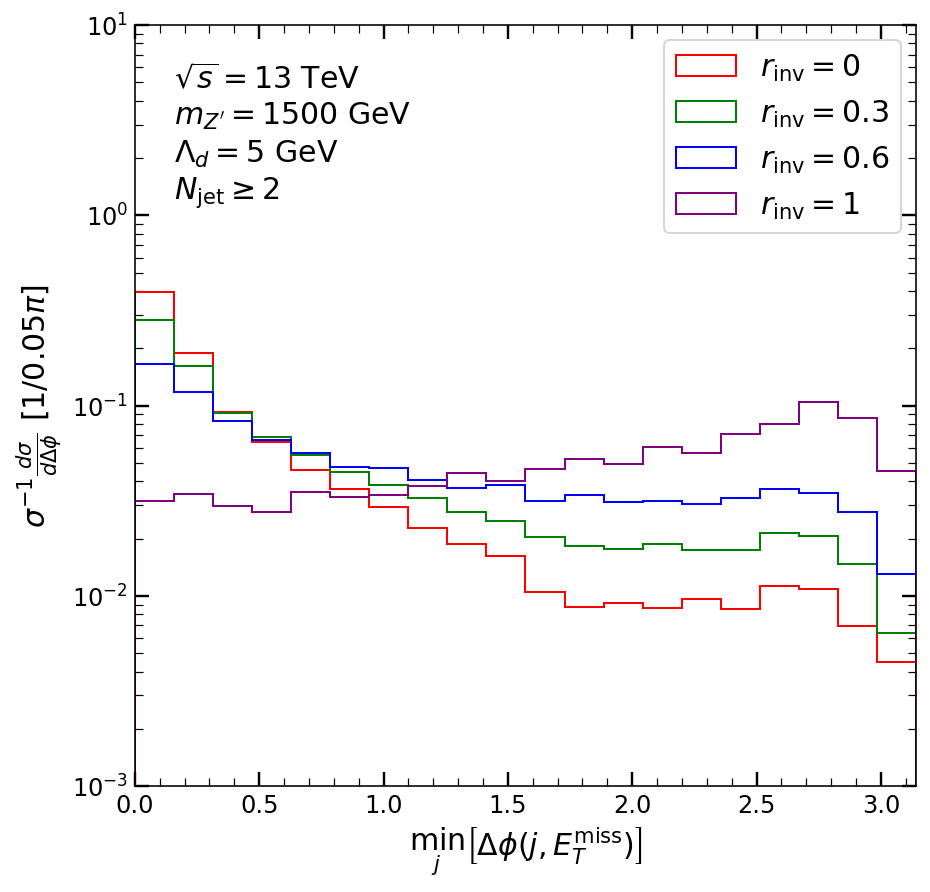

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [59]:
# 43. \min\Delta\phi(j, MET) when N_jet >= 2
hist, bins = plotting('min_Dphi_j_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_j\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_43-dijet-min_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

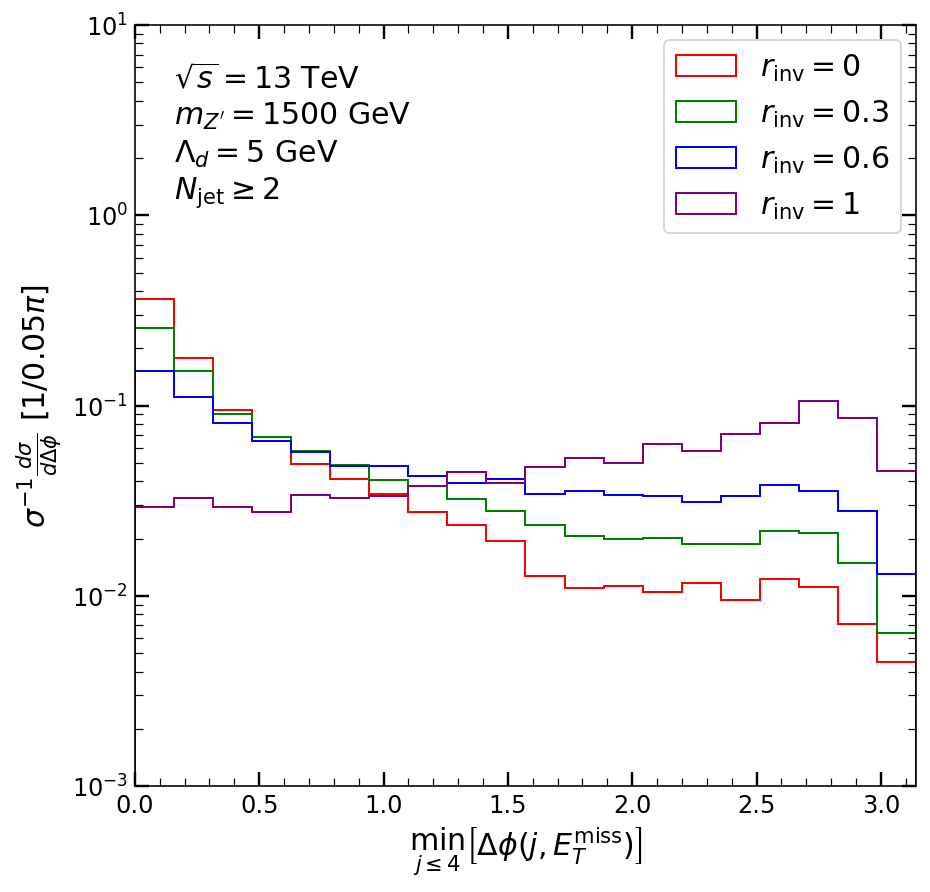

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [60]:
# 44. \min_{j <= 4}\Delta\phi(j, MET) when N_jet >= 2
hist, bins = plotting('min4_Dphi_j_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_{j \leq 4}\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_44-dijet-min4_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

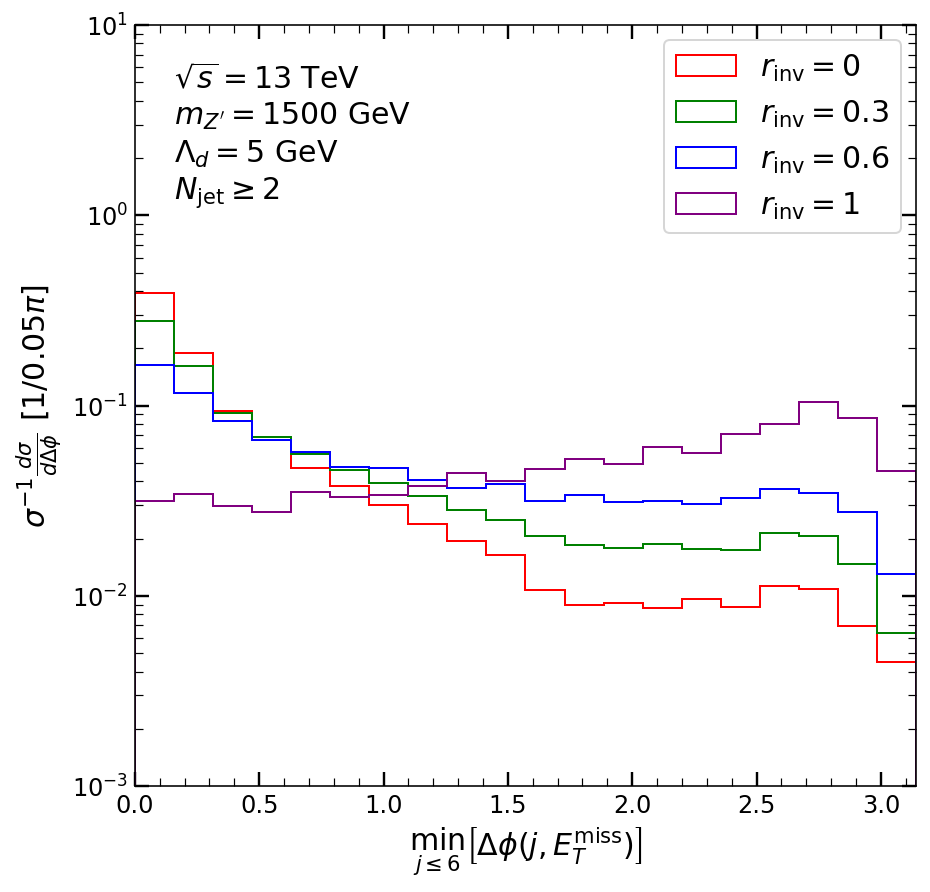

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [61]:
# 45. \min_{j <= 6}\Delta\phi(j, MET) when N_jet >= 2
hist, bins = plotting('min6_Dphi_j_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_{j \leq 6}\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_45-dijet-min6_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

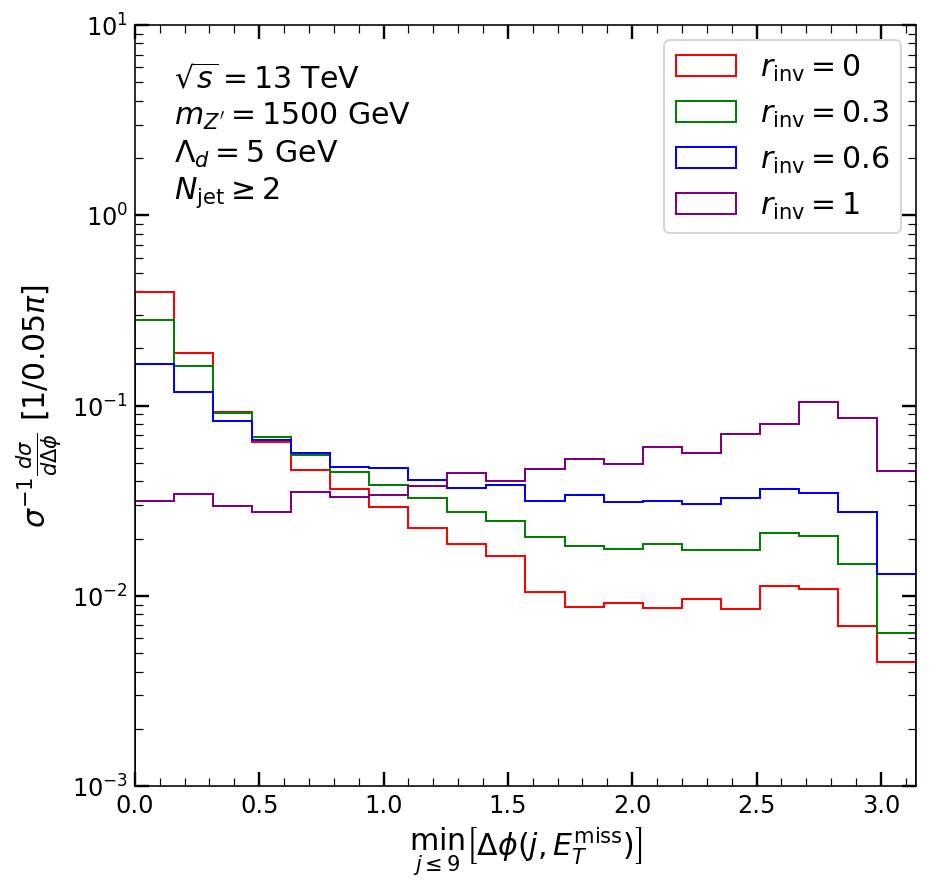

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [62]:
# 46. \min_{j <= 9}\Delta\phi(j, MET) when N_jet >= 2
hist, bins = plotting('min9_Dphi_j_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_{j \leq 9}\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_46-dijet-min9_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

### 3-4. Event selection $N_\mathrm{jet} \ge 3$

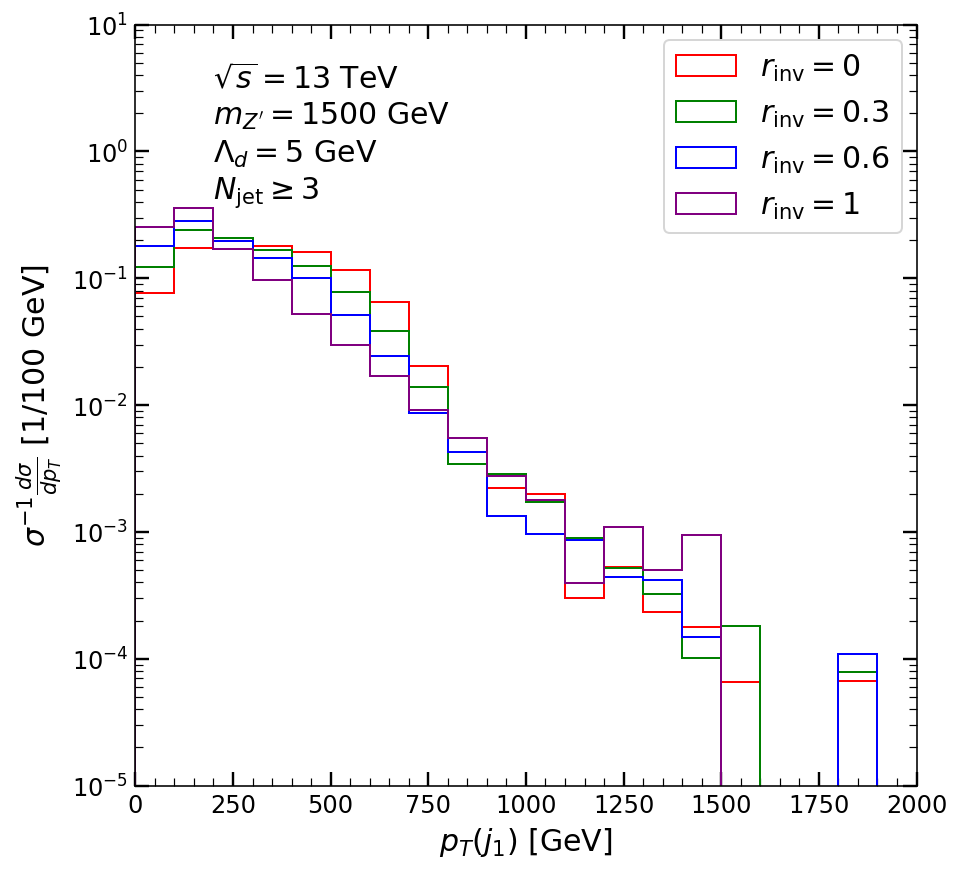

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [63]:
# 47. p_T(j_1) when N_jet >= 3
hist, bins = plotting('pT_1', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_1)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=(0.1, 0.93),
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_47-trijet-pT_1.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

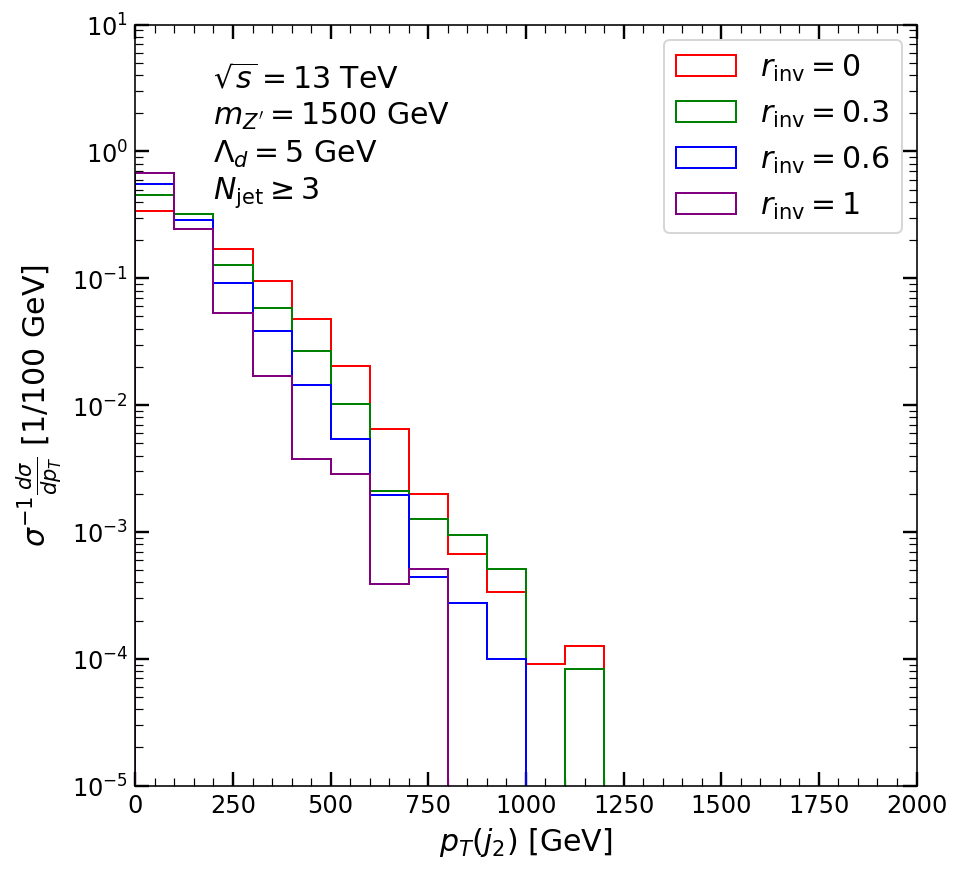

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [64]:
# 48. p_T(j_2) when N_jet >= 3
hist, bins = plotting('pT_2', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_2)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=(0.1, 0.93),
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_48-trijet-pT_2.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

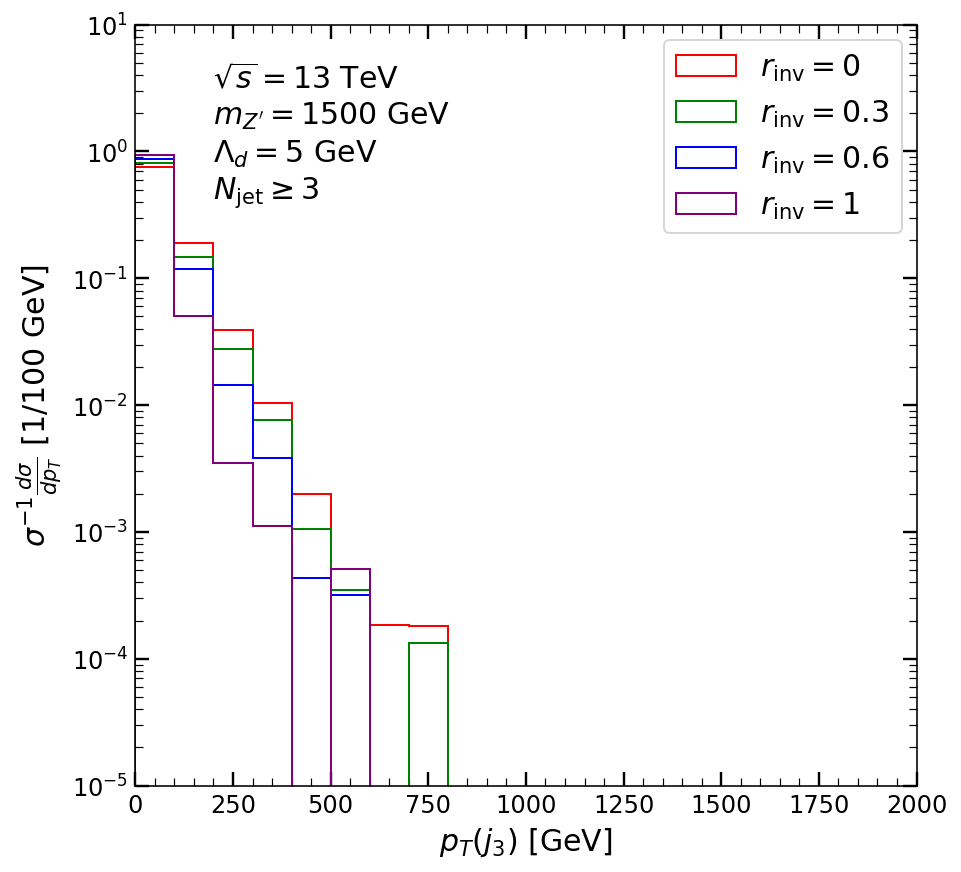

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [65]:
# 49. p_T(j_3) when N_jet >= 3
hist, bins = plotting('pT_3', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_3)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=(0.1, 0.93),
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_49-trijet-pT_3.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

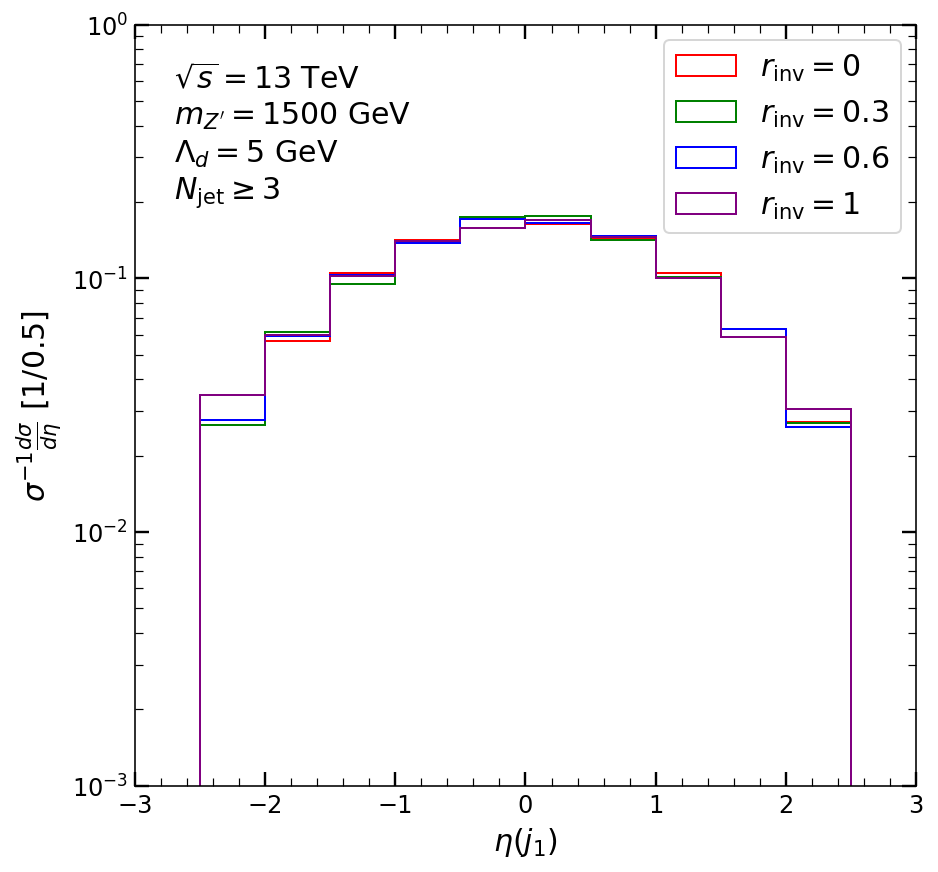

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [66]:
# 50. \eta(j_1) when N_jet >= 3
hist, bins = plotting('eta_1', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_1)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_50-trijet-eta_1.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

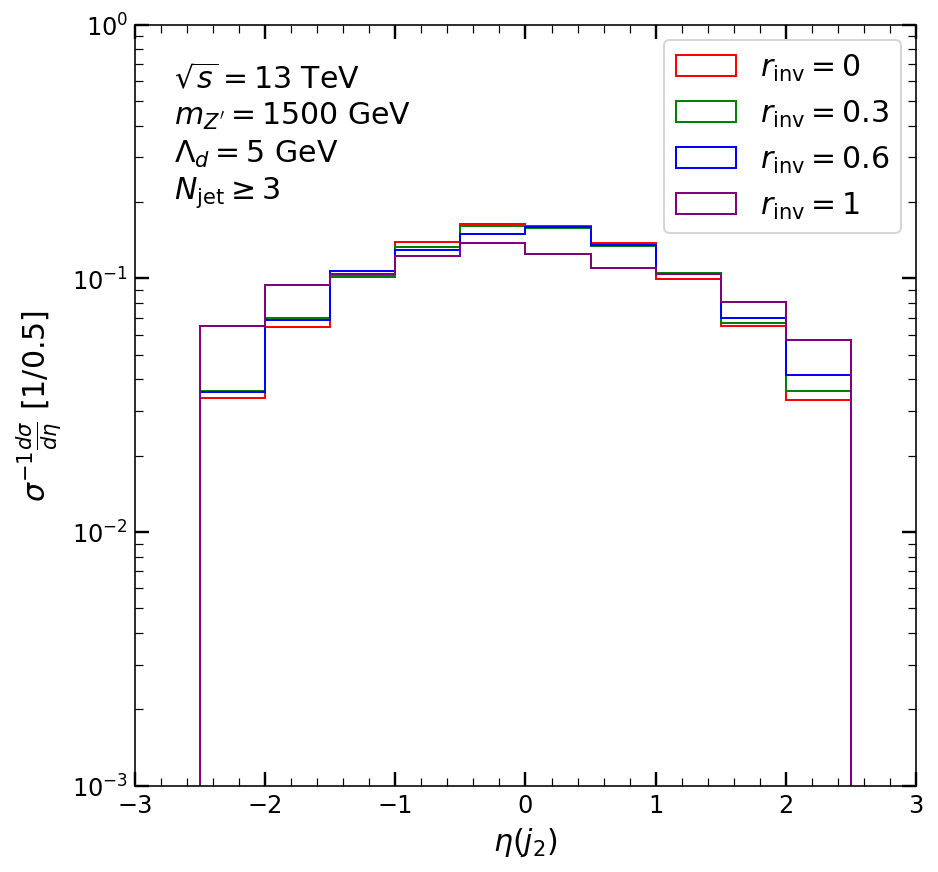

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [67]:
# 51. \eta(j_2) when N_jet >= 3
hist, bins = plotting('eta_2', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_2)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_51-trijet-eta_2.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

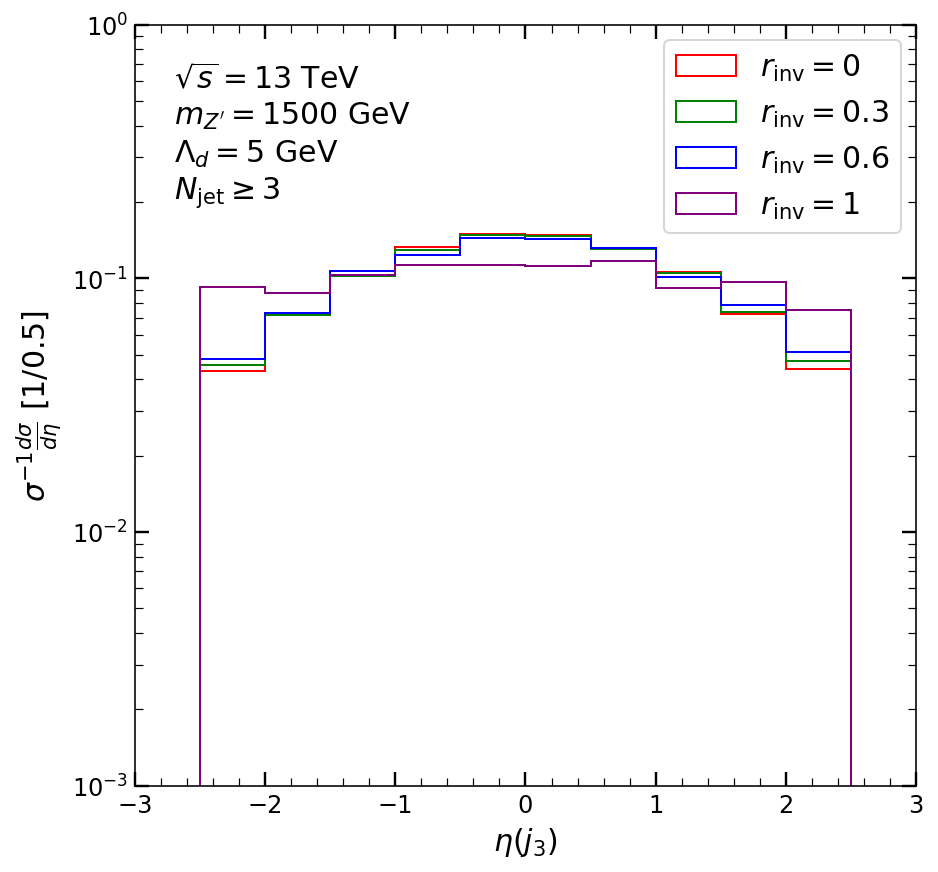

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [68]:
# 52. \eta(j_3) when N_jet >= 3
hist, bins = plotting('eta_3', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_3)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_52-trijet-eta_3.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

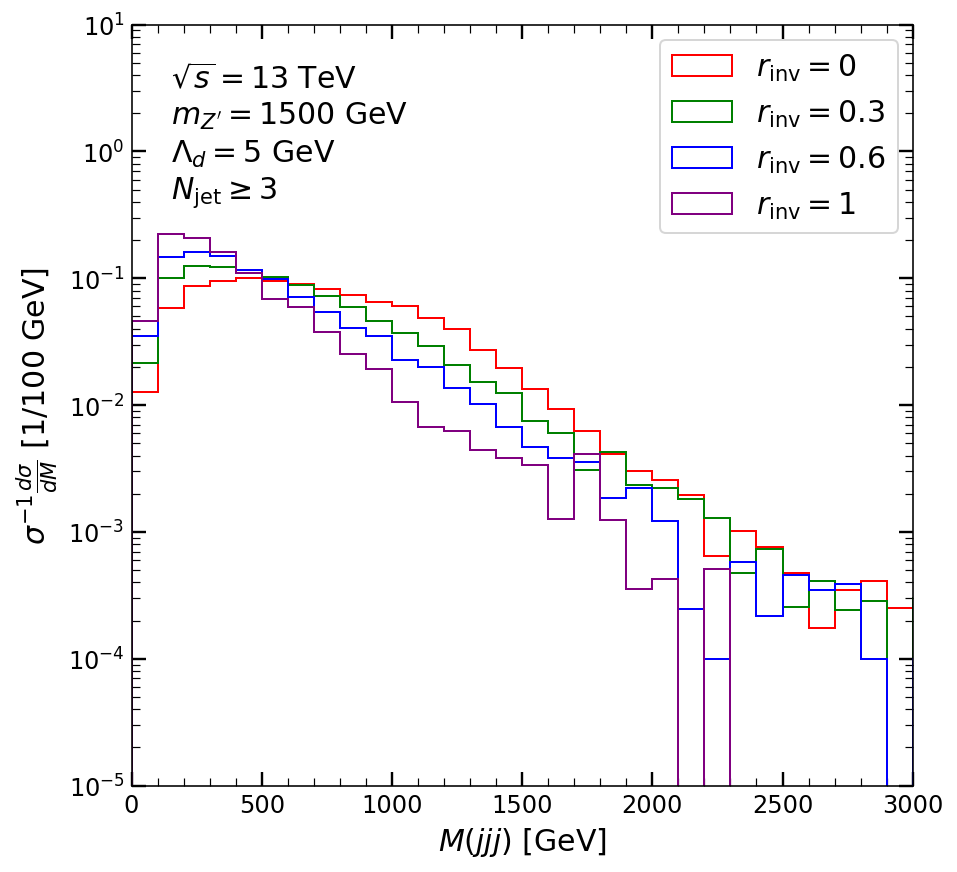

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [69]:
# 53. M(jjj) when N_jet >= 3
hist, bins = plotting('M_jjj', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M(jjj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_53-trijet-M_jjj.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

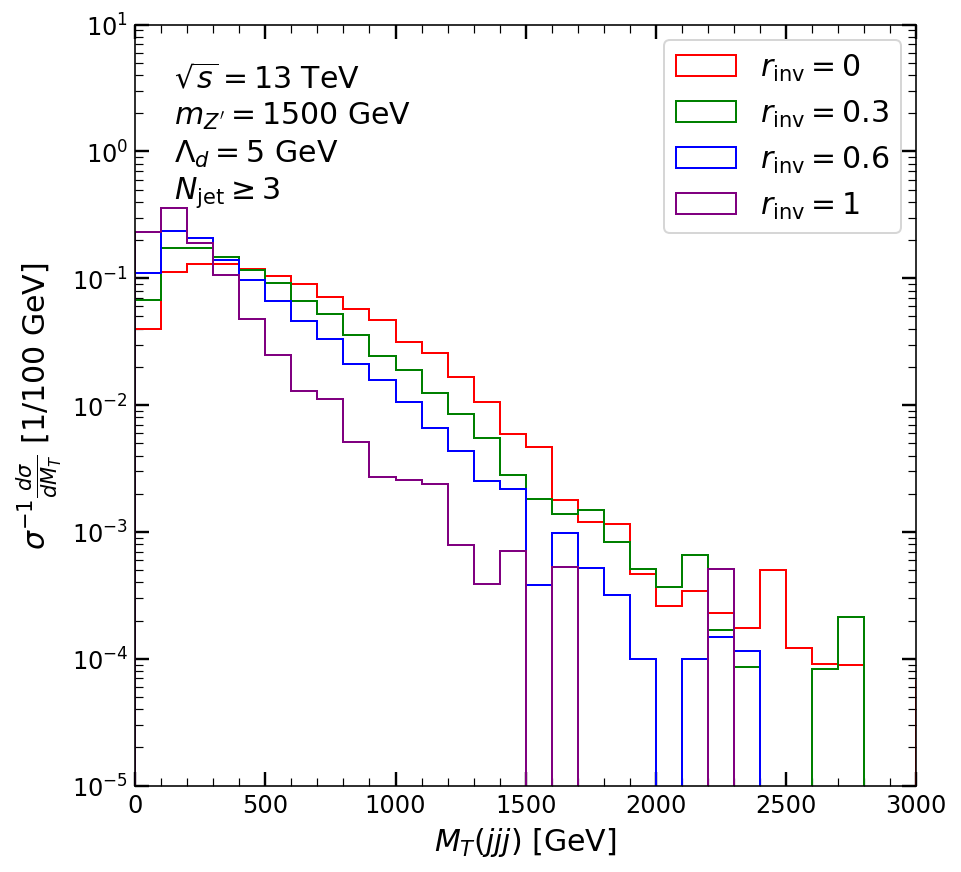

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [70]:
# 54. M_T(jjj) when N_jet >= 3
hist, bins = plotting('MT_jjj', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(jjj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_54-trijet-MT_jjj.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

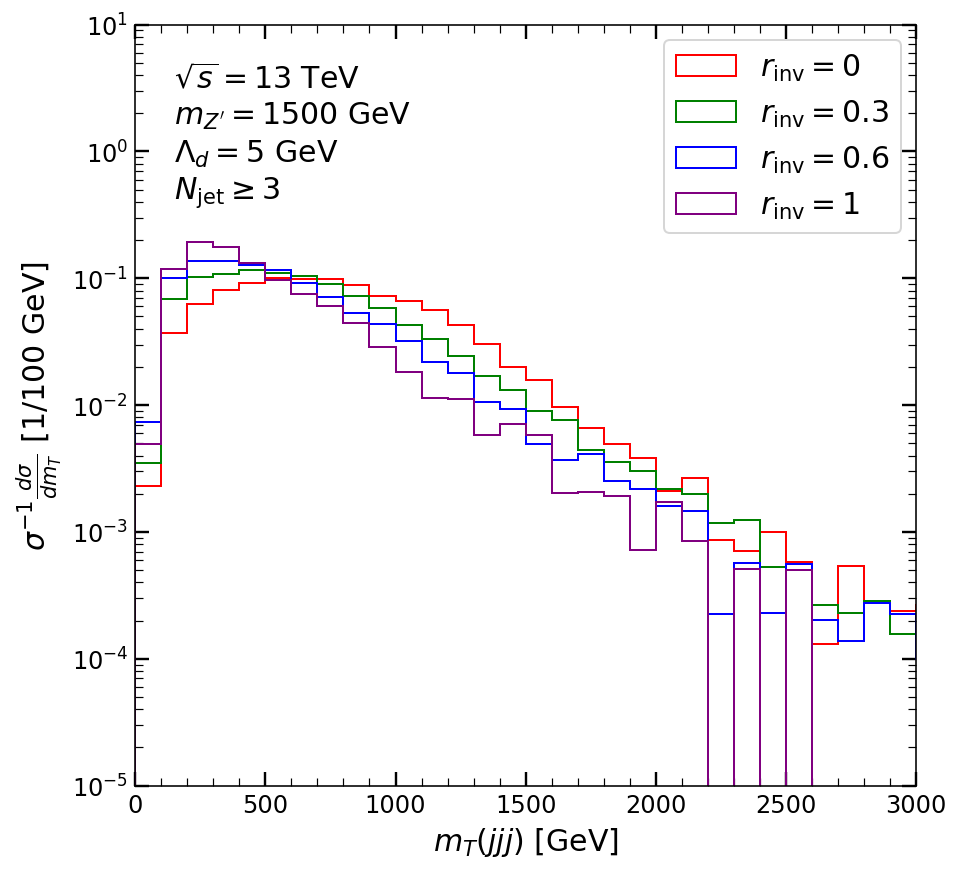

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [71]:
# 55. m_T(jjj) when N_jet >= 3
hist, bins = plotting('mT_jjj', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$m_T(jjj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dm_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_55-trijet-mT_jjj.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

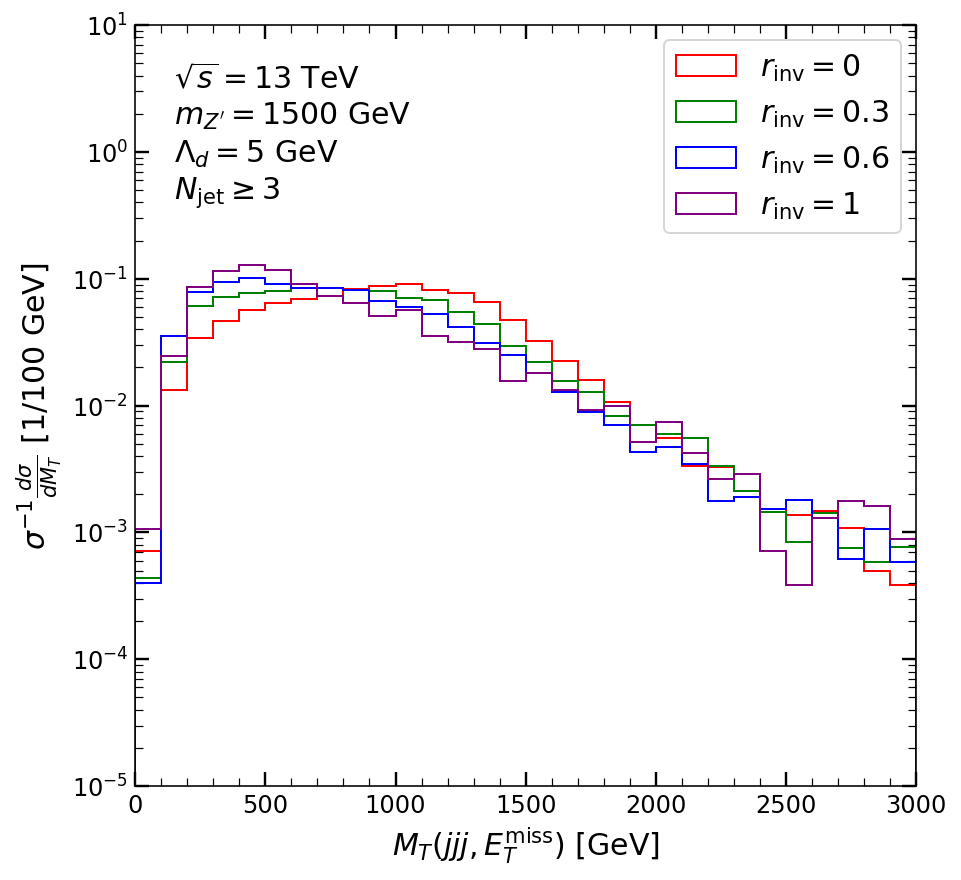

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [72]:
# 56. M_T(jjj, MET) when N_jet >= 3
hist, bins = plotting('MT_jjj_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(jjj, E_T^\mathrm{miss})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_56-trijet-MT_jjj_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

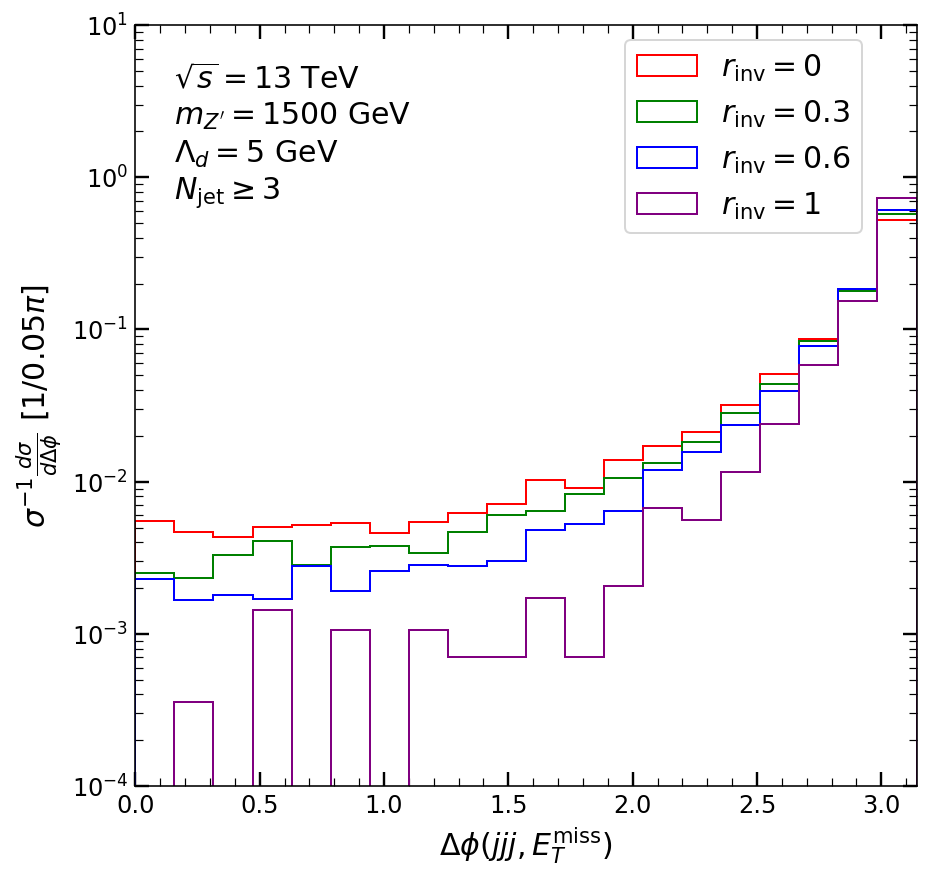

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [73]:
# 57. \Delta\phi(jjj, MET) when N_jet >= 3
hist, bins = plotting('Dphi_jjj_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      legend_bbox_to_anchor=(0.95, 1),
                      xlabel=r'$\Delta\phi(jjj, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_57-trijet-Dphi_jjj_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

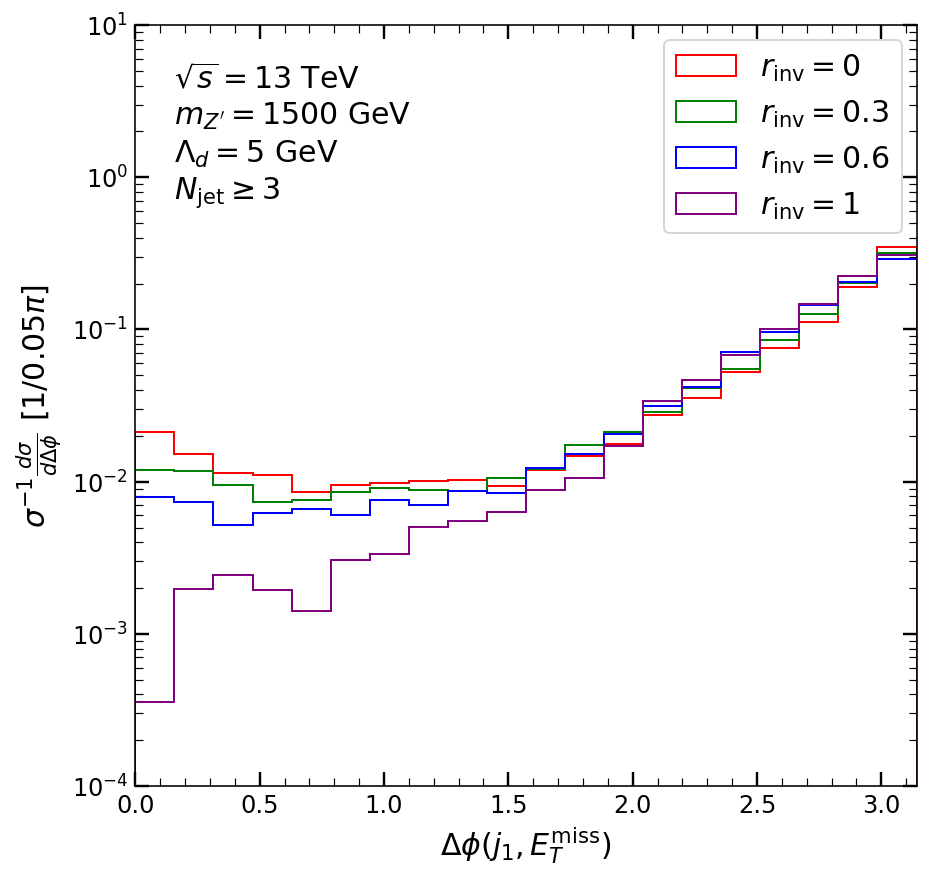

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [74]:
# 58. \Delta\phi(j_1, MET) when N_jet >= 3
hist, bins = plotting('Dphi_j1_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_1, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_58-trijet-Dphi_j1_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

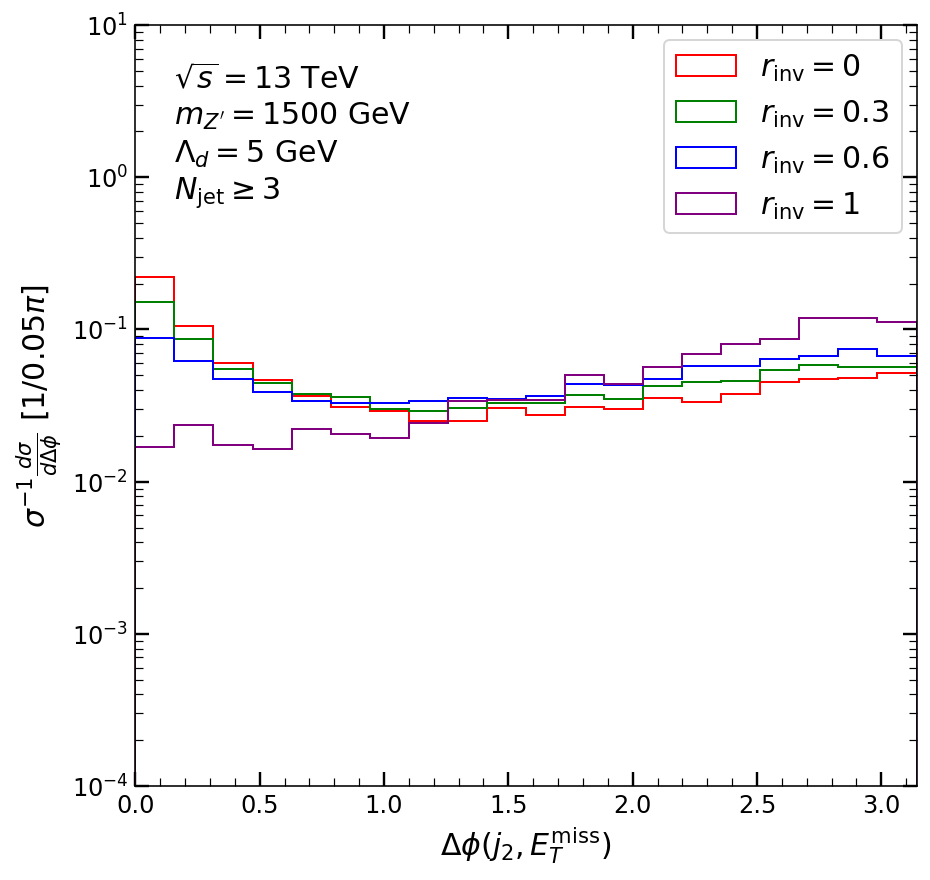

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [75]:
# 59. \Delta\phi(j_2, MET) when N_jet >= 3
hist, bins = plotting('Dphi_j2_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_2, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_59-trijet-Dphi_j2_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

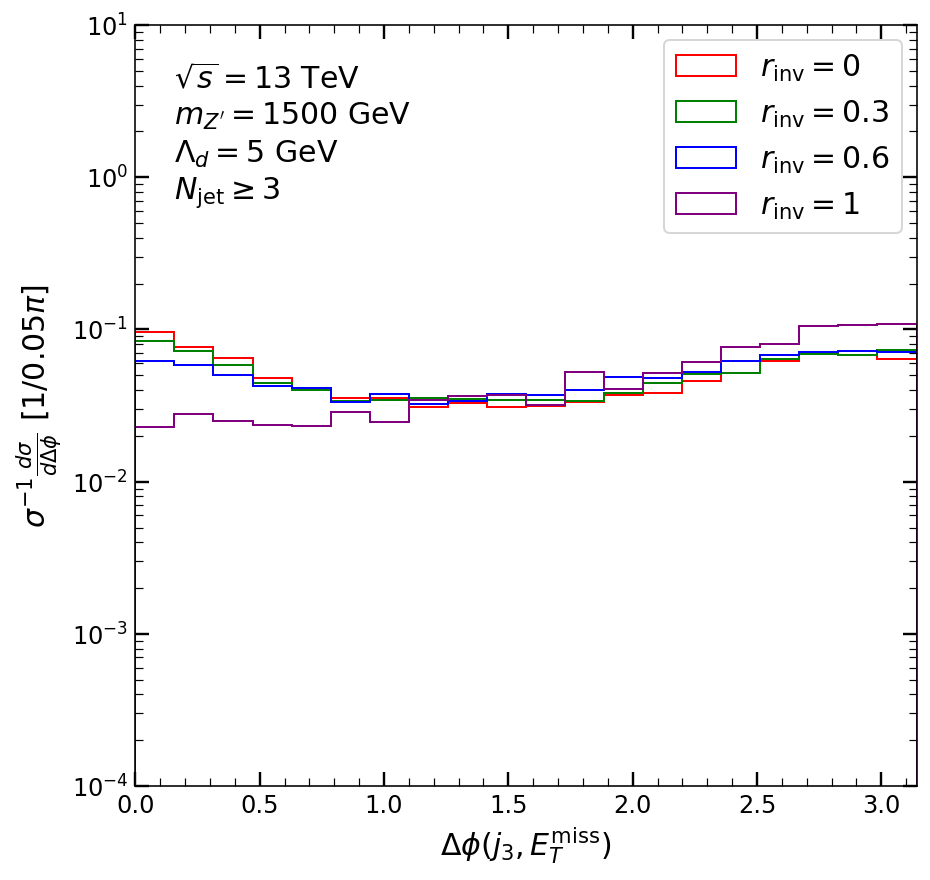

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [76]:
# 60. \Delta\phi(j_3, MET) when N_jet >= 3
hist, bins = plotting('Dphi_j3_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_3, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_60-trijet-Dphi_j3_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

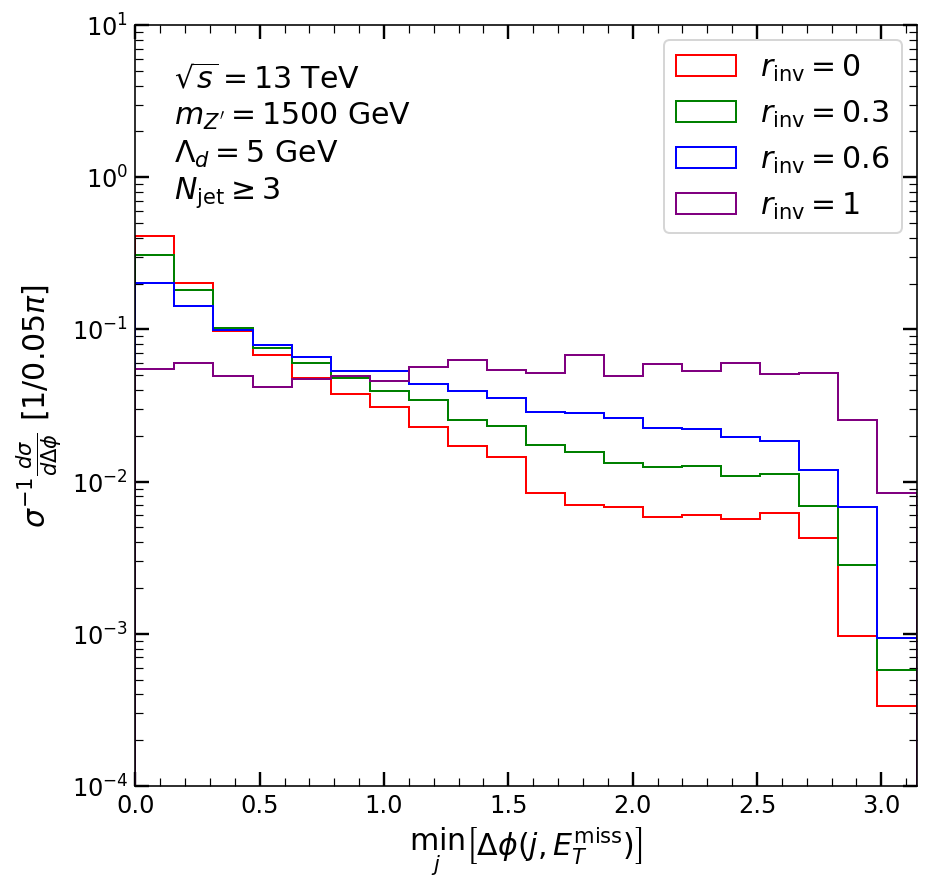

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [77]:
# 61. \min_{j}\Delta\phi(j, MET) when N_jet >= 3
hist, bins = plotting('min_Dphi_j_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_j\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_61-trijet-min_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

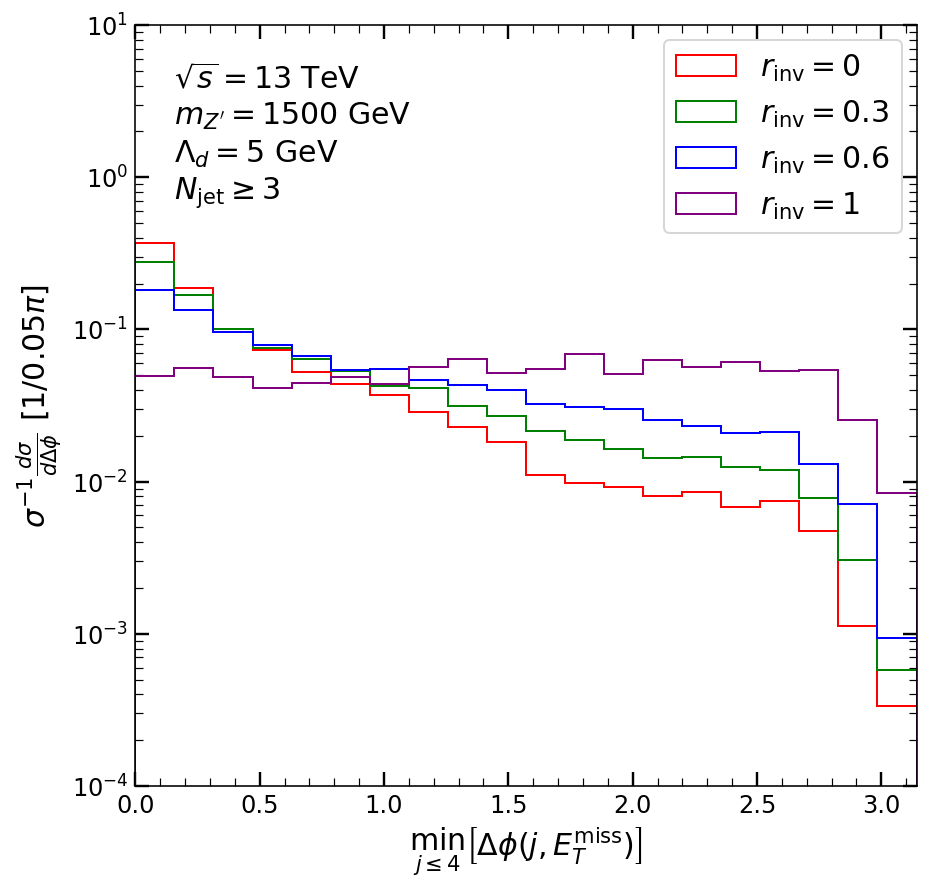

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [78]:
# 62. \min_{j <= 4}\Delta\phi(j, MET) when N_jet >= 3
hist, bins = plotting('min4_Dphi_j_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_{j \leq 4}\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_62-trijet-min4_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

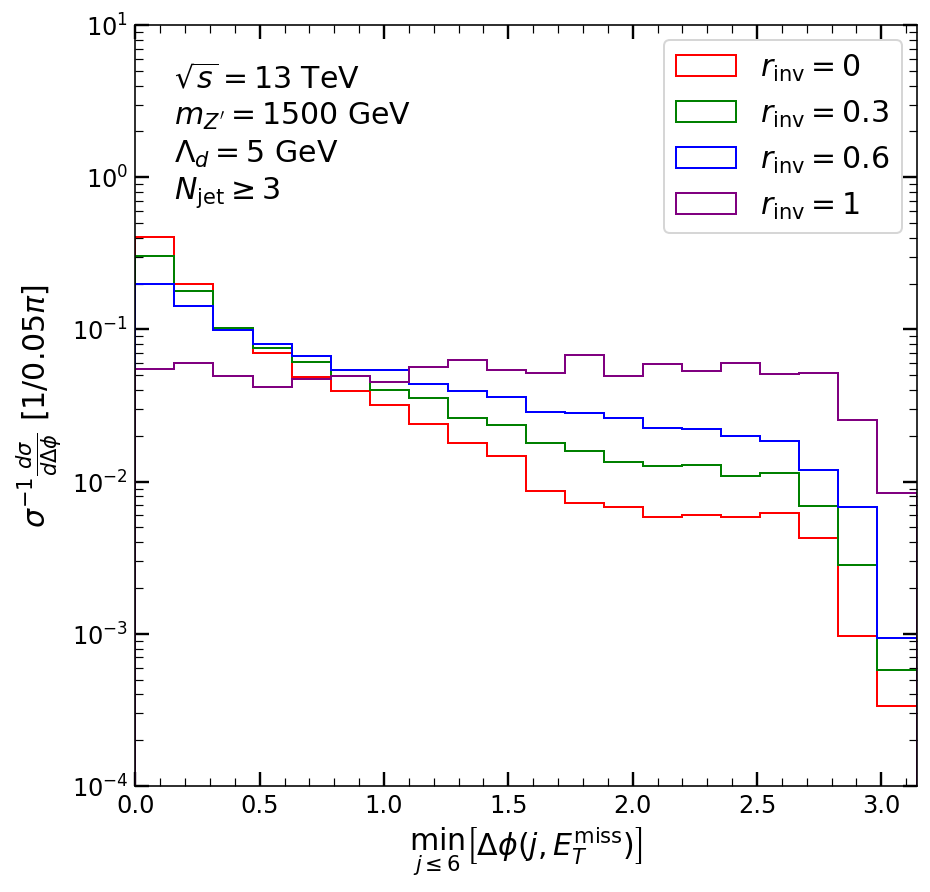

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [79]:
# 63. \min_{j <= 6}\Delta\phi(j, MET) when N_jet >= 3
hist, bins = plotting('min6_Dphi_j_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_{j \leq 6}\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_63-trijet-min6_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

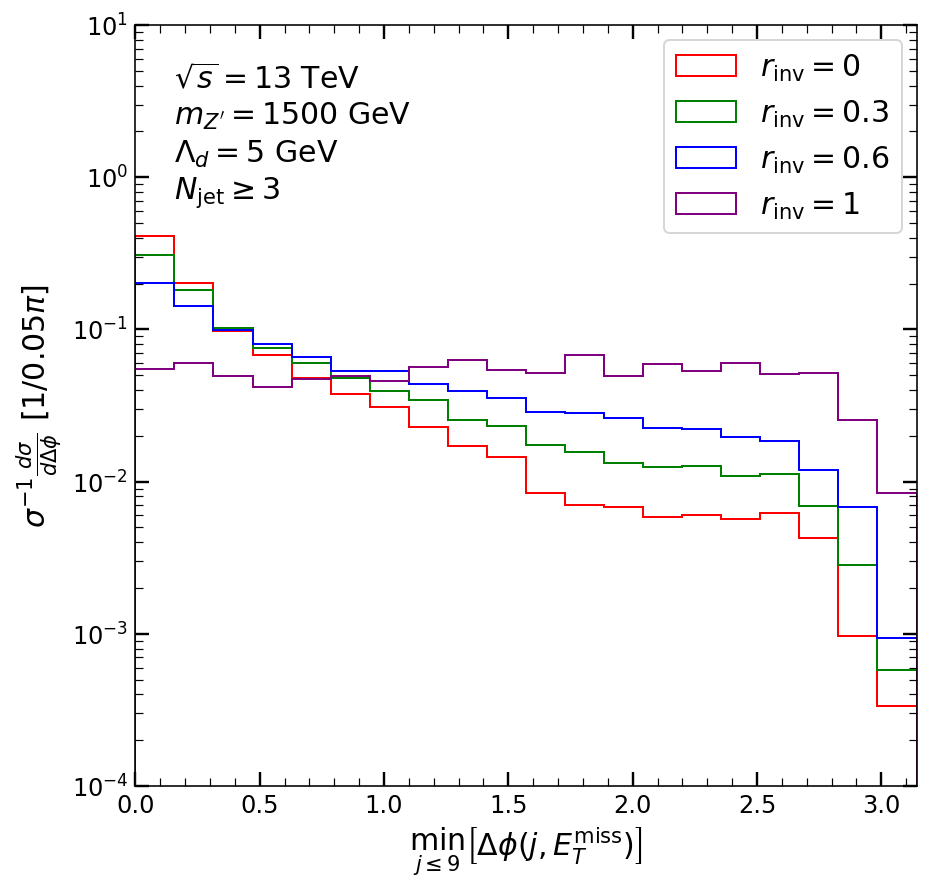

--------------------------------------------------------------------------------
Area of rinv [0, 0.3, 0.6, 1] = [1. 1. 1. 1.]


In [80]:
# 64. \min_{j <= 9}\Delta\phi(j, MET) when N_jet >= 3
hist, bins = plotting('min9_Dphi_j_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_{j \leq 9}\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_1_Lambdad5_varying_rinv/fig_64-trijet-min9_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of rinv {rinv} = {np.sum(hist, axis=1)}')

##### Conclusion: Brilliant!!

In [81]:
dataset[9].head()

MT_jjj_MET  Dphi_jjj_MET  Dphi_j1_MET  Dphi_j2_MET  Dphi_j3_MET  \
0   281.491363      2.573274     2.749587     0.371588     2.424905   
1  1074.834841      3.056714     2.675809     2.791134     0.244963   
2   226.353088      1.051952     0.997800     2.983909     0.223894   
3   990.331650      3.126027     2.957748     2.761544     2.949284   
4   660.700550      2.954761     2.729633     2.232028     0.208906   

   min_Dphi_j_MET  min4_Dphi_j_MET  min6_Dphi_j_MET  min9_Dphi_j_MET  selected  
0        0.371588         0.371588         0.371588         0.371588       1.0  
1        0.235545         0.244963         0.235545         0.235545       2.0  
2        0.223894         0.223894         0.223894         0.223894       3.0  
3        0.677996         2.178447         0.677996         0.677996       5.0  
4        0.208906         0.208906         0.208906         0.208906       6.0

In [82]:
dataset[19].head()

MT_jjj_MET  Dphi_jjj_MET  Dphi_j1_MET  Dphi_j2_MET  Dphi_j3_MET  \
0  628.598105      3.109111     1.770399     2.603022     1.769629   
1  581.086931      3.025805     2.897558     2.945442     0.079480   
2  993.492687      2.870788     2.298874     0.989178     1.772532   
3  326.035380      2.113289     2.686213     0.691025     3.051017   
4  927.480320      2.989574     2.856207     0.074682     1.678693   

   min_Dphi_j_MET  min4_Dphi_j_MET  min6_Dphi_j_MET  min9_Dphi_j_MET  selected  
0        1.769629         1.769629         1.769629         1.769629       1.0  
1        0.079480         0.079480         0.079480         0.079480       4.0  
2        0.273139         0.273139         0.273139         0.273139       5.0  
3        0.691025         0.691025         0.691025         0.691025       7.0  
4        0.074682         0.074682         0.074682         0.074682       8.0

In [83]:
[i + 3 for i in range(0, 40, 10)]

[3, 13, 23, 33]

## Test

In [84]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [85]:
[np.arange(i) for i in range(10)]

[array([], dtype=int64),
 array([0]),
 array([0, 1]),
 array([0, 1, 2]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8])]

In [86]:
a = np.arange(10)
b = np.arange(10, 20)
print(a)
b

[0 1 2 3 4 5 6 7 8 9]


array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [87]:
a < 6

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False])

In [88]:
a[a < 6]

array([0, 1, 2, 3, 4, 5])

In [89]:
b[a < 6]

array([10, 11, 12, 13, 14, 15])

In [90]:
b[a > 6]

array([17, 18, 19])

In [91]:
b[a >= 6]

array([16, 17, 18, 19])

In [92]:
dataset[12].shape

(19373, 17)

In [93]:
a = dataset[12]['pT_1'].to_numpy()
print(a[a > 0].shape)
a[a > 0]

(18847,)


array([ 87.39944212, 156.63172343, 180.41874406, ..., 474.71395195,
        41.9887166 , 558.12977096])

In [94]:
hist, bins = np.histogram(dataset[12]['pT_1'], bins=binning)
print(np.sum(hist))
hist

18847


array([3693, 4381, 3505, 2808, 2121, 1361,  648,  195,   54,   35,   20,
         11,    6,    4,    2,    2,    0,    0,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [95]:
for i in range(0, 40, 10):
    a = dataset[i+2]['pT_1'].to_numpy()
    hist, bins = np.histogram(dataset[i+2]['pT_1'], bins=binning)
    b = a > 0
    print(f'{i}. {a.shape[0]}')
    print(a[a > 0].shape[0], len(b))
    print(np.sum(hist))
    print('-'*10)

0. 19334
19101 19334
19101
----------
10. 19373
18847 19373
18847
----------
20. 19328
17823 19328
17823
----------
30. 19286
12436 19286
12436
----------


In [96]:
# example 1: test for do not count events
a = np.arange(-5, 10)
w = np.array([2, 2, 2, 2, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(f'a = {a}')
print(f'w = {w}')
print('-'*80)
print('for all space:')
hist, bins = np.histogram(a, bins=np.linspace(-10, 10, 21))
print(f'area = {np.sum(hist)}, {hist}')
hist, bins = np.histogram(a, bins=np.linspace(-10, 10, 21), weights=w)
print(f'area = {np.sum(hist)}, {hist}')
print('-'*80)
print('for positive space:')
hist, bins = np.histogram(a, bins=np.linspace(0, 10, 11))
print(f'area = {np.sum(hist)}, {hist}')
hist, bins = np.histogram(a, bins=np.linspace(0, 10, 11), weights=w)
print(f'area = {np.sum(hist)}, {hist}')

a = [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9]
w = [ 2  2  2  2  2  1  2  3  4  5  6  7  8  9 10]
--------------------------------------------------------------------------------
for all space:
area = 15, [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
area = 65, [ 0  0  0  0  0  2  2  2  2  2  1  2  3  4  5  6  7  8  9 10]
--------------------------------------------------------------------------------
for positive space:
area = 10, [1 1 1 1 1 1 1 1 1 1]
area = 55, [ 1  2  3  4  5  6  7  8  9 10]


In [97]:
# example 1: test for do not count events
ss = a >= 0
ww = w[ss]
w_normalized = w/np.sum(ww)
print(f'ss = {ss}')
print(f'ww = {ww}')
print(f'w_normalized = {w_normalized}')
print('-'*80)
hist, bins = np.histogram(a, bins=np.linspace(0, 10, 11), weights=w)
print(f'area = {np.sum(hist)}, {hist}')
print('-'*80)
hist, bins = np.histogram(a, bins=np.linspace(0, 10, 11), weights=w_normalized)
print(f'area = {np.sum(hist)}, {hist}')

ss = [False False False False False  True  True  True  True  True  True  True
  True  True  True]
ww = [ 1  2  3  4  5  6  7  8  9 10]
w_normalized = [0.03636364 0.03636364 0.03636364 0.03636364 0.03636364 0.01818182
 0.03636364 0.05454545 0.07272727 0.09090909 0.10909091 0.12727273
 0.14545455 0.16363636 0.18181818]
--------------------------------------------------------------------------------
area = 55, [ 1  2  3  4  5  6  7  8  9 10]
--------------------------------------------------------------------------------
area = 1.0, [0.01818182 0.03636364 0.05454545 0.07272727 0.09090909 0.10909091
 0.12727273 0.14545455 0.16363636 0.18181818]


In [98]:
a

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [99]:
ss

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [100]:
a[ss]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [101]:
w[ss]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [102]:
# example 2: test for do not count events
a = np.arange(-5, 4)
w = np.array([2, 2, 2, 2, 2, 1, 2, 3, 4])
print(f'a = {a}')
print(f'w = {w}')
print('-'*80)
print('for all space:')
hist, bins = np.histogram(a, bins=np.linspace(-10, 10, 21))
print(f'area = {np.sum(hist)}, {hist}')
hist, bins = np.histogram(a, bins=np.linspace(-10, 10, 21), weights=w)
print(f'area = {np.sum(hist)}, {hist}')
print('-'*80)
print('for positive space:')
hist, bins = np.histogram(a, bins=np.linspace(0, 10, 11))
print(f'area = {np.sum(hist)}, {hist}')
hist, bins = np.histogram(a, bins=np.linspace(0, 10, 11), weights=w)
print(f'area = {np.sum(hist)}, {hist}')

a = [-5 -4 -3 -2 -1  0  1  2  3]
w = [2 2 2 2 2 1 2 3 4]
--------------------------------------------------------------------------------
for all space:
area = 9, [0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
area = 20, [0 0 0 0 0 2 2 2 2 2 1 2 3 4 0 0 0 0 0 0]
--------------------------------------------------------------------------------
for positive space:
area = 4, [1 1 1 1 0 0 0 0 0 0]
area = 10, [1 2 3 4 0 0 0 0 0 0]


In [103]:
# example 2: test for do not count events
ss = a >= 0
ww = w[ss]
w_normalized = w/np.sum(ww)
print(f'ss = {ss}')
print(f'ww = {ww}')
print(f'w_normalized = {w_normalized}')
print('-'*80)
hist, bins = np.histogram(a, bins=np.linspace(0, 10, 11), weights=w)
print(f'area = {np.sum(hist)}, {hist}')
print('-'*80)
hist, bins = np.histogram(a, bins=np.linspace(0, 10, 11), weights=w_normalized)
print(f'area = {np.sum(hist)}, {hist}')

ss = [False False False False False  True  True  True  True]
ww = [1 2 3 4]
w_normalized = [0.2 0.2 0.2 0.2 0.2 0.1 0.2 0.3 0.4]
--------------------------------------------------------------------------------
area = 10, [1 2 3 4 0 0 0 0 0 0]
--------------------------------------------------------------------------------
area = 1.0, [0.1 0.2 0.3 0.4 0.  0.  0.  0.  0.  0. ]
